In [1]:
import pandas as pd
df = pd.read_csv('fire_csv.csv')

In [3]:
import pandas as pd
import re
fire_df = pd.read_csv('fire_csv.csv')
# Assume the run number is part of the "INPUTS" column and extract it
fire_df['run_number'] = fire_df['ENABLE_SPOTTING'].str.extract('(\d+)-lhs-large').astype(int)
fire_df = fire_df.sort_values(by='run_number', ascending=True)

# Print the DataFrame to see the new column
#fire_df.head(40)
print(fire_df.shape)
files = fire_df['Description'].tolist()
#for x in files: print(x)
pattern='(\d+)-lhs-large'
run_numbers = []
run_list = []
file_list = fire_df['Description'].tolist()
for file in file_list:
    matches = re.findall(pattern, file)
    #if len(matches) == 1: print(f'{matches}')
    run_numbers += [int(match) for match in matches]

# Print the number of different items
print(f'Number of different items: {len(run_numbers)}')

# Print the run numbers that failed (missing sequential numbers from 0 to 578)
failed_runs = set(range(3840)) - set(run_numbers)
print('Failed runs:', sorted(failed_runs))
print('Num Failed runs:', len(failed_runs))


(3840, 32)
Number of different items: 3840
Failed runs: [0]
Num Failed runs: 1


In [84]:
# Read the CSV file
df = pd.read_csv('./sobol_seq_inputs.csv')

# Filter the rows based on the 'Run Number' column
filtered_df = df[df['Run Number'].isin(failed_runs)]

# Save the filtered data as a new CSV file
filtered_df.to_csv('./rem_sobol_runs.csv', index=False)

In [4]:
#fire_df.columns
df = fire_df[fire_df['Day 8 Fire Area'] < 100.0]
df.head()

Description  INPUTS WIND_CONFIG  \
3100  inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-...  inputs    ORIGINAL   
3098  inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-...  inputs    ORIGINAL   
3095  inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-...  inputs    ORIGINAL   
3094  inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-...  inputs    ORIGINAL   
3090  inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-...  inputs    ORIGINAL   

     ENABLE_SPOTTING  CROWN_FIRE_MODEL  Wall clock time  Day 1 Fire Area  \
3100   193-lhs-large                 0              NaN              0.0   
3098   195-lhs-large                 0              NaN              0.0   
3095   198-lhs-large                 0              NaN              0.0   
3094   199-lhs-large                 0              NaN              0.0   
3090   201-lhs-large                 0              NaN              0.0   

      Day 2 Fire Area  Day 3 Fire Area  Day 4 Fire Area  ...  Day 1 IOU  \
3100            0.534            4.611            8.854  ...        0.0   
3098            0.001            1.901            5.862  ...        0.0   
3095            0.417            4.340           10.182  ...        0.0   
3094            0.487            4.092            8.932  ...        0.0   
3090            0.486            4.568            9.130  ...        0.0   

      Day 2 IOU  Day 3 IOU  Day 4 IOU  Day 5 IOU  Day 6 IOU  Day 7 IOU  \
3100      0.015      0.035      0.071      0.079      0.100      0.111   
3098      0.000      0.013      0.046      0.059      0.079      0.083   
3095      0.010      0.030      0.073      0.088      0.122      0.153   
3094      0.014      0.030      0.068      0.090      0.149      0.219   
3090      0.014      0.034      0.072      0.079      0.102      0.107   

      Day 8 IOU  Comments on anything interesting  run_number  
3100      0.130                              None         193  
3098      0.098                              None         195  
3095      0.185                              None         198  
3094      0.265                              None         199  
3090      0.123                              None         201  

[5 rows x 32 columns]

In [5]:
import pandas as pd
import os
import re

def extract_parameters_from_data(csv_path, output_dir):
    # Read the CSV file
    df_perim = pd.read_csv(csv_path)

    # Define the parameters to extract
    parameters = [
        "ENABLE_SPOTTING", "ENABLE_SURFACE_FIRE_SPOTTING", "GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MIN",
        "GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX", "CROWN_FIRE_SPOTTING_PERCENT_MIN",
        "CROWN_FIRE_SPOTTING_PERCENT_MAX", "CRITICAL_SPOTTING_FIRELINE_INTENSITY",
        "SPOTTING_DISTRIBUTION_TYPE", "MEAN_SPOTTING_DIST_MIN", "MEAN_SPOTTING_DIST_MAX",
        "NORMALIZED_SPOTTING_DIST_VARIANCE_MIN", "NORMALIZED_SPOTTING_DIST_VARIANCE_MAX",
        "SPOT_WS_EXP_LO", "SPOT_WS_EXP_HI", "SPOT_FLIN_EXP_LO", "SPOT_FLIN_EXP_HI",
        "NEMBERS_MIN", "NEMBERS_MAX_LO", "NEMBERS_MAX_HI", "PIGN_MIN", "PIGN_MAX",
        "WIND_SPEED", "WIND_DIRECTION", "WIND_CONFIG", "INPUT_DIR",
    ]

    mc_parameters = [
        "CC",
        "CBH",
        "CH",
        "CBD",
        "WS",
        "WD",
        "M1",
        "M10",
        "M100"]

    # Iterate through the rows of the DataFrame
    for index, row in df_perim.iterrows():
        description = row['Description']
        description = description.replace("_time_of_arrival.tif", "")
        subdir_name = os.path.join(output_dir, description)

        print(index, output_dir, description)


        # 1. Construct the path to the fire_size_stats.csv
        csv_path = os.path.join(subdir_name, 'fire_size_stats.csv')

        # 2. Check if the file exists
        if os.path.exists(csv_path):
            
            # 3. Read the CSV and extract the values
            csv_data = pd.read_csv(csv_path)
            
            # Assuming each parameter is a column in the CSV
            wall_clock_time = csv_data.get('Wall clock time (s)').iloc[0] if 'Wall clock time (s)' in csv_data.columns else None
            fire_volume = csv_data.get('Fire volume (ac-ft)').iloc[0] if 'Fire volume (ac-ft)' in csv_data.columns else None
            nembers = csv_data.get('Nembers').iloc[0] if 'Nembers' in csv_data.columns else None

            # 4. Update the df_perim dataframe
            if wall_clock_time:
                df_perim.at[index, 'Wall clock time (s)'] = wall_clock_time
            if fire_volume:
                df_perim.at[index, 'Fire volume (ac-ft)'] = fire_volume
            if nembers:  
                df_perim.at[index, 'Nembers'] = nembers
            print(wall_clock_time, fire_volume, nembers)

        # Find all .data files in the subdirectory
        data_files = [file for file in os.listdir(subdir_name) if file.endswith('.data')]
        if data_files:
            # Take the first .data file found
            data_file_path = os.path.join(subdir_name, data_files[0])

            with open(data_file_path, 'r') as data_file:
                data_content = data_file.read()

                # Extract the parameters from the .data file
                for parameter in parameters:
                    match = re.search(f'{parameter}\s*=\s*([\w\.\-]+)', data_content)
                    if match:
                        value = match.group(1)
                        # You might want to process the value here (e.g., convert to the desired type)
                        df_perim.at[index, parameter] = value

                # Split the configuration into lines
                lines = data_content.strip().split("\n")

                for parameter in mc_parameters:
                    # Look for the line with RASTER_TO_PERTURB containing 'M100' and then find the corresponding PDF_LOWER_LIMIT
                    for i, line in enumerate(lines):
                        if "RASTER_TO_PERTURB" in line and f"{parameter}" in line:
                            pdf_lower_limit_line = lines[i + 4]  # PDF_LOWER_LIMIT is 4 lines below RASTER_TO_PERTURB for this parameter
                            pdf_lower_limit_value = float(pdf_lower_limit_line.split("=")[-1].strip())
                            df_perim.at[index, parameter] = pdf_lower_limit_value
                            #print(f"{i}, PDF_LOWER_LIMIT for {parameter}: {pdf_lower_limit_value}")
                            break

    return df_perim

# Call the function with your inputs
csv_path = 'fire_csv.csv'
output_dir = r'C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2\outputs'
df_perim1 = extract_parameters_from_data(csv_path, output_dir)

# csv_path = r'C:\Users\mnlee2\Desktop\data\saved_outputs\lhs_large_4\fire_csv.csv'
# output_dir = r'C:\Users\mnlee2\Desktop\data\saved_outputs\lhs_large_4\outputs'
# df_perim2 = extract_parameters_from_data(csv_path, output_dir)



0 C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2\outputs inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3839-lhs-large_CROWN-FIRE-MODEL=2
1 C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2\outputs inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3836-lhs-large_CROWN-FIRE-MODEL=2
2 C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2\outputs inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3835-lhs-large_CROWN-FIRE-MODEL=2
3 C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2\outputs inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3838-lhs-large_CROWN-FIRE-MODEL=2
4 C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2\outputs inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3840-lhs-large_CROWN-FIRE-MODEL=2
5 C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2\outputs inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3834-lhs-large_CROWN-FIRE-MODEL=2
6 C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2\outputs inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3833-lhs-large_CROWN-FIRE-MODEL=2
7 C:\Users\mn

In [6]:
df_perim1.columns
# Filter the rows where 'Wall clock time (s)' has valid (non-NaN) values
valid_rows = df_perim1[df_perim1['Wall clock time (s)'].notnull()]

# Print the number of such rows
print(f"Number of rows with valid values for 'Wall clock time (s)': {len(valid_rows)}")


Number of rows with valid values for 'Wall clock time (s)': 1368


In [8]:
#df_perim = pd.concat([df_perim1, df_perim2], axis=0, ignore_index=True)
df_perim = df_perim1
print(df_perim.columns)
print(df_perim.shape)

Index(['Description', 'INPUTS', 'WIND_CONFIG', 'ENABLE_SPOTTING',
       'CROWN_FIRE_MODEL', 'Wall clock time', 'Day 1 Fire Area',
       'Day 2 Fire Area', 'Day 3 Fire Area', 'Day 4 Fire Area',
       'Day 5 Fire Area', 'Day 6 Fire Area', 'Day 7 Fire Area',
       'Day 8 Fire Area', 'Day 1 VIIRS Area', 'Day 2 VIIRS Area',
       'Day 3 VIIRS Area', 'Day 4 VIIRS Area', 'Day 5 VIIRS Area',
       'Day 6 VIIRS Area', 'Day 7 VIIRS Area', 'Day 8 VIIRS Area', 'Day 1 IOU',
       'Day 2 IOU', 'Day 3 IOU', 'Day 4 IOU', 'Day 5 IOU', 'Day 6 IOU',
       'Day 7 IOU', 'Day 8 IOU', 'Comments on anything interesting',
       'ENABLE_SURFACE_FIRE_SPOTTING',
       'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MIN',
       'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
       'CROWN_FIRE_SPOTTING_PERCENT_MIN', 'CROWN_FIRE_SPOTTING_PERCENT_MAX',
       'CRITICAL_SPOTTING_FIRELINE_INTENSITY', 'MEAN_SPOTTING_DIST_MIN',
       'MEAN_SPOTTING_DIST_MAX', 'NORMALIZED_SPOTTING_DIST_VARIANCE_MIN',
       'NORMALIZED_SPO

In [9]:
# List of columns to modify

cols_to_modify = ['Wall clock time (s)', 'Fire volume (ac-ft)', 'Nembers']

# Create a copy of df_perim before filling NaN values
df_perim_filled = df_perim.copy()

# Fill NaN values with zeros, excluding specified columns
cols_to_fill = [col for col in df_perim.columns if col not in cols_to_modify]
df_perim_filled[cols_to_fill] = df_perim_filled[cols_to_fill].fillna(0)
df_perim = df_perim_filled

for col in df_perim.columns:
    try:
        # Try converting to float
        df_perim[col] = df_perim[col].astype(float)
    except ValueError:
        try:
            # If conversion to float fails, try converting to string
            df_perim[col] = df_perim[col].astype(str)
        except Exception:
            # If both conversions fail, print the column name
            print(f"Failed to convert column: {col}")

df_perim.head(-40)

Description  INPUTS WIND_CONFIG  \
0     inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3839-lh...  inputs           0   
1     inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3836-lh...  inputs           0   
2     inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3835-lh...  inputs           0   
3     inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3838-lh...  inputs           0   
4     inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3840-lh...  inputs           0   
...                                                 ...     ...         ...   
3795  inputs=inputs_WIND=_SPOTTING=_S-CONFIG=1881-lh...  inputs           0   
3796  inputs=inputs_WIND=_SPOTTING=_S-CONFIG=1880-lh...  inputs           0   
3797  inputs=inputs_WIND=_SPOTTING=_S-CONFIG=1879-lh...  inputs           0   
3798  inputs=inputs_WIND=_SPOTTING=_S-CONFIG=1878-lh...  inputs           0   
3799  inputs=inputs_WIND=_SPOTTING=_S-CONFIG=1877-lh...  inputs           0   

     ENABLE_SPOTTING  CROWN_FIRE_MODEL  Wall clock time  Day 1 Fire Area  \
0            .FALSE.               2.0              0.0              0.0   
1            .FALSE.               2.0              0.0              0.0   
2            .FALSE.               2.0              0.0              0.0   
3            .FALSE.               2.0              0.0              0.0   
4            .FALSE.               2.0              0.0              0.0   
...              ...               ...              ...              ...   
3795         .FALSE.               2.0              0.0              0.0   
3796         .FALSE.               2.0              0.0              0.0   
3797         .FALSE.               2.0              0.0              0.0   
3798         .FALSE.               2.0              0.0              0.0   
3799         .FALSE.               2.0              0.0              0.0   

      Day 2 Fire Area  Day 3 Fire Area  Day 4 Fire Area  ...    CH   CBD  \
0               0.001            0.001            0.001  ...  6.18 -0.10   
1               0.001            1.175            9.445  ...  6.18  0.06   
2               0.001            0.001            0.001  ... -0.10 -5.30   
3               0.001            1.308            9.026  ...  6.18 -0.10   
4               0.001            0.001            0.001  ...  6.18 -0.10   
...               ...              ...              ...  ...   ...   ...   
3795            2.588           60.088          242.113  ...  4.87  0.08   
3796            2.493           59.790          236.968  ...  4.87  0.08   
3797            2.493           59.790          236.968  ...  4.87  0.08   
3798            2.187           59.575          233.425  ...  4.87  0.08   
3799            2.620           59.706          225.742  ...  4.87  0.08   

        WS     WD    M1   M10  M100  Wall clock time (s)  Fire volume (ac-ft)  \
0      3.8   -8.4  0.09 -0.03 -0.00                  NaN                  NaN   
1      3.8   -8.4  0.09 -0.03  0.01                  NaN                  NaN   
2      3.8   -8.4  0.09 -0.03  0.01                  NaN                  NaN   
3      3.8   -8.4  0.09 -0.06  0.01                  NaN                  NaN   
4      3.8   -8.4  0.09 -0.03  0.01                  NaN                  NaN   
...    ...    ...   ...   ...   ...                  ...                  ...   
3795  17.1  357.2 -0.01  0.07 -0.06                  NaN                  NaN   
3796  17.1  357.2 -0.01  0.07 -0.06                  NaN                  NaN   
3797  17.1  357.2 -0.01  0.07 -0.06                  NaN                  NaN   
3798  17.1  357.2 -0.01  0.07 -0.06                  NaN                  NaN   
3799  17.1  357.2 -0.01  0.07 -0.06                  NaN                  NaN   

      Nembers  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
3795      NaN  
3796      NaN  
3797      NaN  
3798      NaN  
3799      NaN  

[3800 rows x 62 columns]

In [20]:
df_perim.to_csv('fire_csv.csv', index=False)


In [21]:
df_perim.shape

(3840, 62)

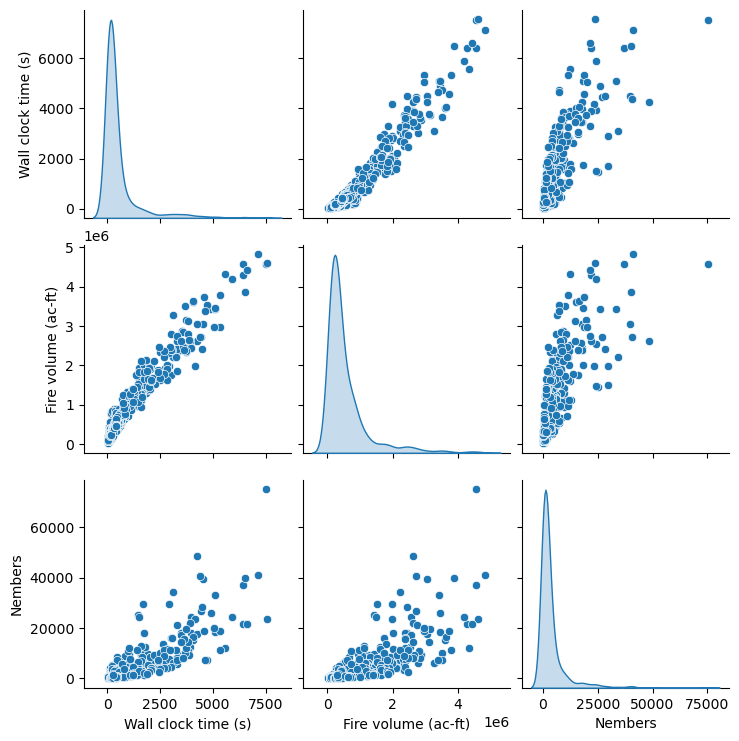

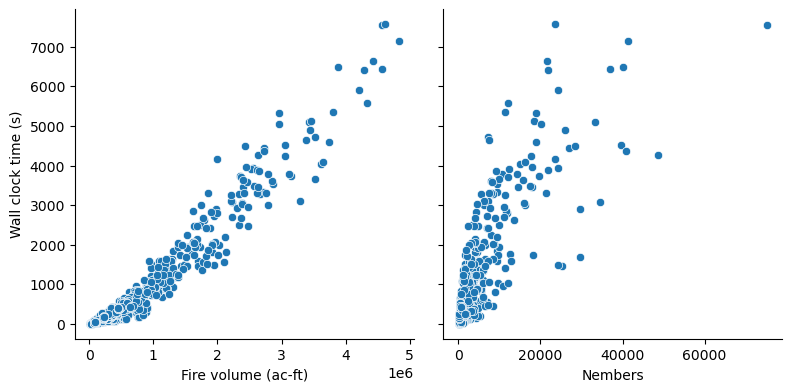

In [62]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # List of columns for the pair plot
# cols_for_pairplot = [
#     'Wall clock time (s)', 'Fire volume (ac-ft)', 'Nembers', 
# ]

# # Create the pair plot
# sns.pairplot(df_perim[cols_for_pairplot], diag_kind='kde')

# # Show the plot
# plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Columns for the x and y axes
y_cols = ['Wall clock time (s)']
x_cols = ['Fire volume (ac-ft)', 'Nembers']

# Create the PairGrid
g = sns.PairGrid(df_perim, x_vars=x_cols, y_vars=y_cols, height=4)
g.map(sns.scatterplot)

# Show the plot
plt.show()

[-4057.65573219   680.55330842]


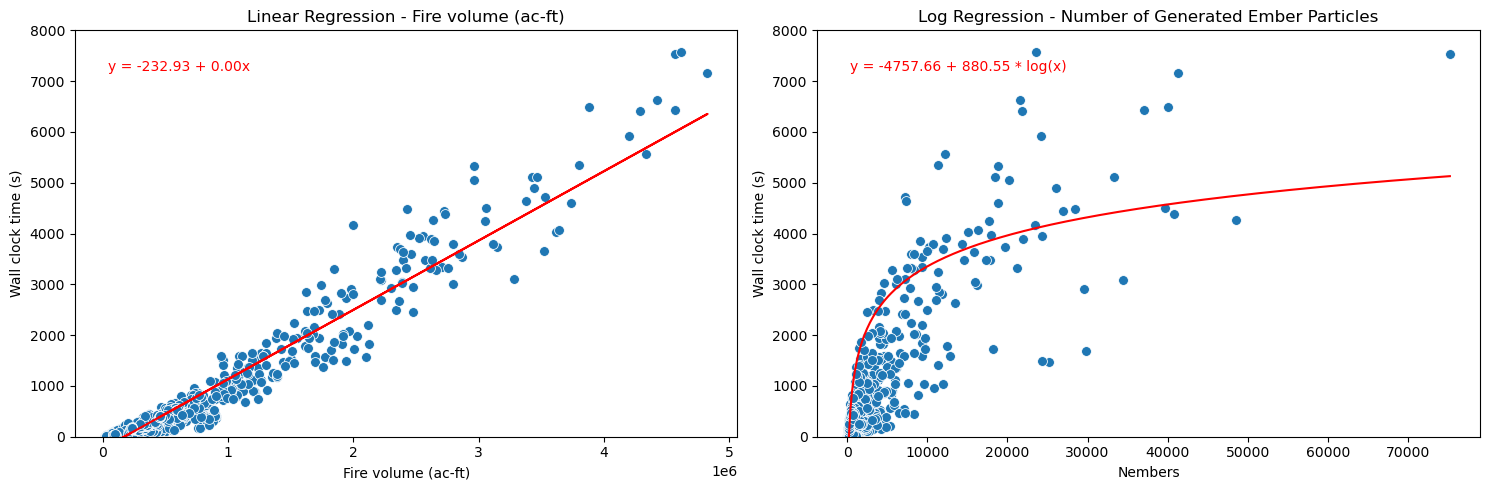

Number of NaN values in 'Fire volume (ac-ft)': 2472


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample DataFrame (for illustrative purposes; replace with your df_perim)
# df_perim = pd.DataFrame({
#     'Fire volume (ac-ft)': np.random.rand(100) * 10,
#     'Nembers': np.random.rand(100) * 100,
#     'Wall clock time (s)': np.random.rand(100) * 5
# })

# Columns for the x and y axes
y_col = 'Wall clock time (s)'
x_cols = ['Fire volume (ac-ft)', 'Nembers']

def log_func(x, a, b):
    return a + b * np.log(x)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

def log_func(x, a, b):
    return a + b * np.log(x)



for i, x_col in enumerate(x_cols):

    mask = ~np.isnan(df_perim[x_col]) & ~np.isnan(df_perim[y_col]) & ~np.isinf(df_perim[x_col]) & ~np.isinf(df_perim[y_col])
    filtered_x = df_perim[x_col][mask]
    filtered_y = df_perim[y_col][mask]

    sns.scatterplot(x=df_perim[x_col], y=df_perim[y_col], ax=axes[i], s=50)

    # Linear regression for the first subplot
    if i == 0:
        # Fit linear regression
        X = df_perim[x_col][mask].values.reshape(-1, 1)
        model = LinearRegression().fit(X, df_perim[y_col][mask])
        y_pred = model.predict(X)
        
        # Plot regression
        axes[i].plot(df_perim[x_col][mask], y_pred, color='red')

        # Display equation
        eqn_label = f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x'
        axes[i].text(0.05, 0.9, eqn_label, transform=axes[i].transAxes, color='red')
        axes[i].set_title(f"Linear Regression - {x_col}")


    # Logarithmic regression for the second subplot
    else:
        # Create a mask to filter out NaN or inf values

        
        # Fit the data on the filtered data
        popt, _ = curve_fit(log_func, filtered_x, filtered_y)
        print(popt)
        popt[1]+=200
        popt[0]-=700

        # Predict y-values based on the log regression
        x_vals = np.linspace(min(filtered_x), max(filtered_x), 400)
        y_vals = log_func(x_vals, *popt)

        # Plot the regression
        axes[i].plot(x_vals, y_vals, color='red')

        # Display the function equation
        eqn_label = f'y = {popt[0]:.2f} + {popt[1]:.2f} * log(x)'
        axes[i].text(0.05, 0.9, eqn_label, transform=axes[i].transAxes, color='red')
        axes[i].set_ylim(0, 8000)
        axes[i].set_title(f"Log Regression - Number of Generated Ember Particles")

    axes[i].set_ylim(0, 8000)

plt.tight_layout()
plt.show()

nan_count = df_perim['Fire volume (ac-ft)'].isna().sum()
print("Number of NaN values in 'Fire volume (ac-ft)':", nan_count)


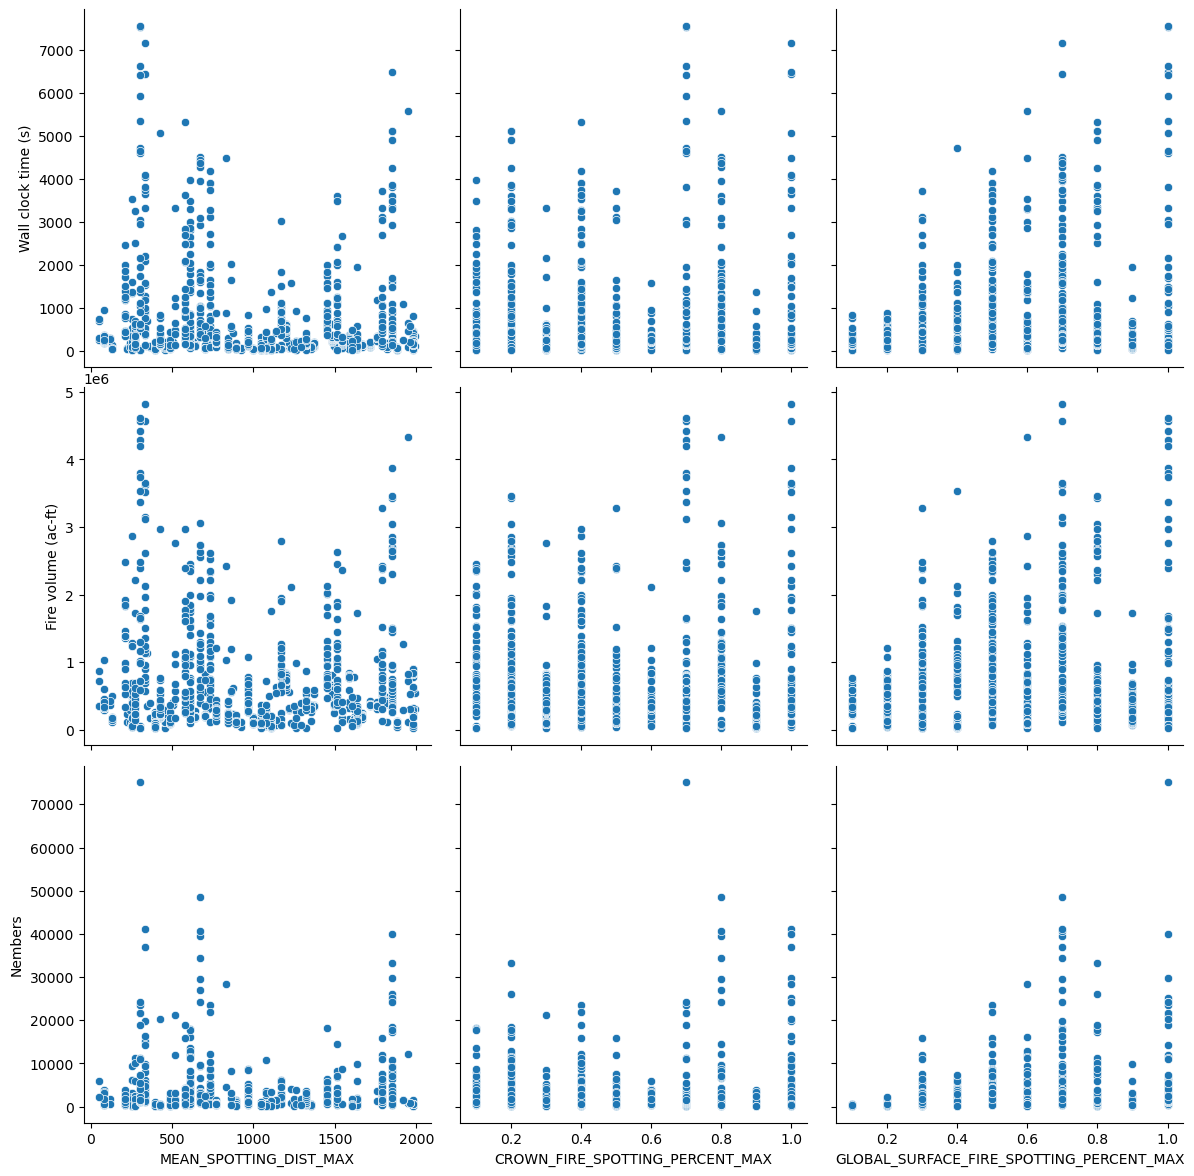

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns for the x and y axes
x_cols = ['MEAN_SPOTTING_DIST_MAX', 'CROWN_FIRE_SPOTTING_PERCENT_MAX', 'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX']
y_cols = ['Wall clock time (s)', 'Fire volume (ac-ft)', 'Nembers']

# Create the PairGrid
g = sns.PairGrid(df_perim, x_vars=x_cols, y_vars=y_cols, height=4)
g.map(sns.scatterplot)

# Show the plot
plt.show()


In [103]:
# Sort the dataframe by "Day 8 IOU" in descending order
sorted_df = df_perim.sort_values(by="Day 8 IOU", ascending=False)

# Take the top 20 rows
top_20 = sorted_df.head(20)

# Save this subset to a CSV
top_20.to_csv("best_IOU.csv", index=False)

In [11]:
import matplotlib.pyplot as plt
param_cols = [
       'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MIN',
       'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
       'CROWN_FIRE_SPOTTING_PERCENT_MIN', 'CROWN_FIRE_SPOTTING_PERCENT_MAX',
       'CRITICAL_SPOTTING_FIRELINE_INTENSITY', 'MEAN_SPOTTING_DIST_MIN',
       'MEAN_SPOTTING_DIST_MAX', 'SPOT_WS_EXP_LO',
       'SPOT_WS_EXP_HI', 'SPOT_FLIN_EXP_LO', 'SPOT_FLIN_EXP_HI', 'NEMBERS_MIN',
       'NEMBERS_MAX_LO', 'NEMBERS_MAX_HI', 'PIGN_MIN', 'PIGN_MAX', 'CC', 'CBH',
       'CH', 'CBD',"WS", "WD", 'M1', 'M10', 'M100']
# Dictionary to store the best parameters and IOU for each input resolution
best_params_and_iou_per_resolution = {}
pcols_IOU = param_cols
pcols_IOU.append('Day 8 IOU')
# Iterate through each group of input resolutions
for input_resolution, group in df_perim.groupby('INPUTS'):
    # Get the row with the largest 'Day 8 IOU'
    best_row = group.loc[group['Day 8 IOU'].idxmax()]
    best_params = best_row[pcols_IOU]
    best_iou = best_row['Day 8 IOU']
    print(best_iou)
    print(input_resolution, best_iou)
    # Store the result
    best_params_and_iou_per_resolution[input_resolution] = (best_params, best_iou)



0.56
inputs 0.56


In [101]:
best_params_and_iou_per_resolution

{'inputs': (GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MIN       0.1
  GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX       0.3
  CROWN_FIRE_SPOTTING_PERCENT_MIN                0.1
  CROWN_FIRE_SPOTTING_PERCENT_MAX                0.5
  CRITICAL_SPOTTING_FIRELINE_INTENSITY        3867.0
  MEAN_SPOTTING_DIST_MIN                         1.0
  MEAN_SPOTTING_DIST_MAX                      1325.0
  SPOT_WS_EXP_LO                                 0.1
  SPOT_WS_EXP_HI                                 1.0
  SPOT_FLIN_EXP_LO                               0.1
  SPOT_FLIN_EXP_HI                               0.3
  NEMBERS_MIN                                    1.0
  NEMBERS_MAX_LO                                 1.0
  NEMBERS_MAX_HI                                 5.0
  PIGN_MIN                                       0.0
  PIGN_MAX                                      25.0
  CC                                            0.08
  CBH                                           3.71
  CH                                

In [9]:
# Separate the parameters and IOUs
params_data = {k: v[0] for k, v in best_params_and_iou_per_resolution.items()}
ious_data = {k: v[1] for k, v in best_params_and_iou_per_resolution.items()}

# Create DataFrames
params_df = pd.DataFrame.from_dict(params_data, orient='index')
ious_df = pd.Series(ious_data, name='Day 8 IOU')

# Combine the DataFrames
final_df = pd.concat([params_df, ious_df], axis=1)

# Now you have a DataFrame with the parameters and IOUs
print(final_df)

       GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MIN  \
inputs                                      0.1   

       GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX  \
inputs                                      0.3   

       CROWN_FIRE_SPOTTING_PERCENT_MIN CROWN_FIRE_SPOTTING_PERCENT_MAX  \
inputs                             0.1                             0.5   

       CRITICAL_SPOTTING_FIRELINE_INTENSITY MEAN_SPOTTING_DIST_MIN  \
inputs                               3867.0                    1.0   

       MEAN_SPOTTING_DIST_MAX SPOT_WS_EXP_LO SPOT_WS_EXP_HI SPOT_FLIN_EXP_LO  \
inputs                 1325.0            0.1            1.0              0.1   

        ...   CBH    CH   CBD   WS     WD    M1   M10  M100  Day 8 IOU  \
inputs  ...  3.71  0.01 -6.95  4.0  289.7 -0.09  0.03  0.08       0.56   

        Day 8 IOU  
inputs       0.56  

[1 rows x 27 columns]


In [10]:
final_df.T.head(40)

inputs
GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MIN     0.1
GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX     0.3
CROWN_FIRE_SPOTTING_PERCENT_MIN              0.1
CROWN_FIRE_SPOTTING_PERCENT_MAX              0.5
CRITICAL_SPOTTING_FIRELINE_INTENSITY      3867.0
MEAN_SPOTTING_DIST_MIN                       1.0
MEAN_SPOTTING_DIST_MAX                    1325.0
SPOT_WS_EXP_LO                               0.1
SPOT_WS_EXP_HI                               1.0
SPOT_FLIN_EXP_LO                             0.1
SPOT_FLIN_EXP_HI                             0.3
NEMBERS_MIN                                    1
NEMBERS_MAX_LO                                 1
NEMBERS_MAX_HI                                 5
PIGN_MIN                                     0.0
PIGN_MAX                                    25.0
CC                                          0.08
CBH                                         3.71
CH                                          0.01
CBD                                        -6.95
WS                                           4.0
WD                                         289.7
M1                                         -0.09
M10                                         0.03
M100                                        0.08
Day 8 IOU                                   0.56
Day 8 IOU                                   0.56

In [184]:
data = best_params_per_resolution
# Transpose the DataFrame since the dictionary keys should be the index, not the columns
df = pd.DataFrame.from_dict(data, orient='index', columns=pcols_IOU)

df.T.head(40)

inputs inputs-1000M inputs-500M
GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MIN     0.1          0.1         0.2
GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX     0.5          0.3         0.4
CROWN_FIRE_SPOTTING_PERCENT_MIN              0.1          0.3         0.6
CROWN_FIRE_SPOTTING_PERCENT_MAX              0.8          0.3         0.6
CRITICAL_SPOTTING_FIRELINE_INTENSITY      3562.0       2214.0      2948.0
MEAN_SPOTTING_DIST_MIN                       1.0        171.0        16.0
MEAN_SPOTTING_DIST_MAX                     821.0        200.0        16.0
SPOT_WS_EXP_LO                               0.1          0.2         0.1
SPOT_WS_EXP_HI                               0.9          0.5         0.4
SPOT_FLIN_EXP_LO                             0.1          0.2         0.1
SPOT_FLIN_EXP_HI                             0.4          0.3         0.5
NEMBERS_MIN                                    1            2           2
NEMBERS_MAX_LO                                 1            2           2
NEMBERS_MAX_HI                                 5            2           2
PIGN_MIN                                     0.0          8.0        13.0
PIGN_MAX                                    29.0         64.0        91.0
CC                                          0.07        -0.08        0.01
CBH                                        -4.69         2.84        3.95
CH                                          6.56         0.09        2.64
CBD                                        -0.08        -0.64        -0.1
WS                                           5.6          1.3         4.5
WD                                         157.5        340.2       -41.2
M1                                          0.06          0.0         0.0
M10                                         0.02          0.0         0.0
M100                                        0.08          0.0         0.0
Day 8 IOU                                    NaN          NaN         NaN

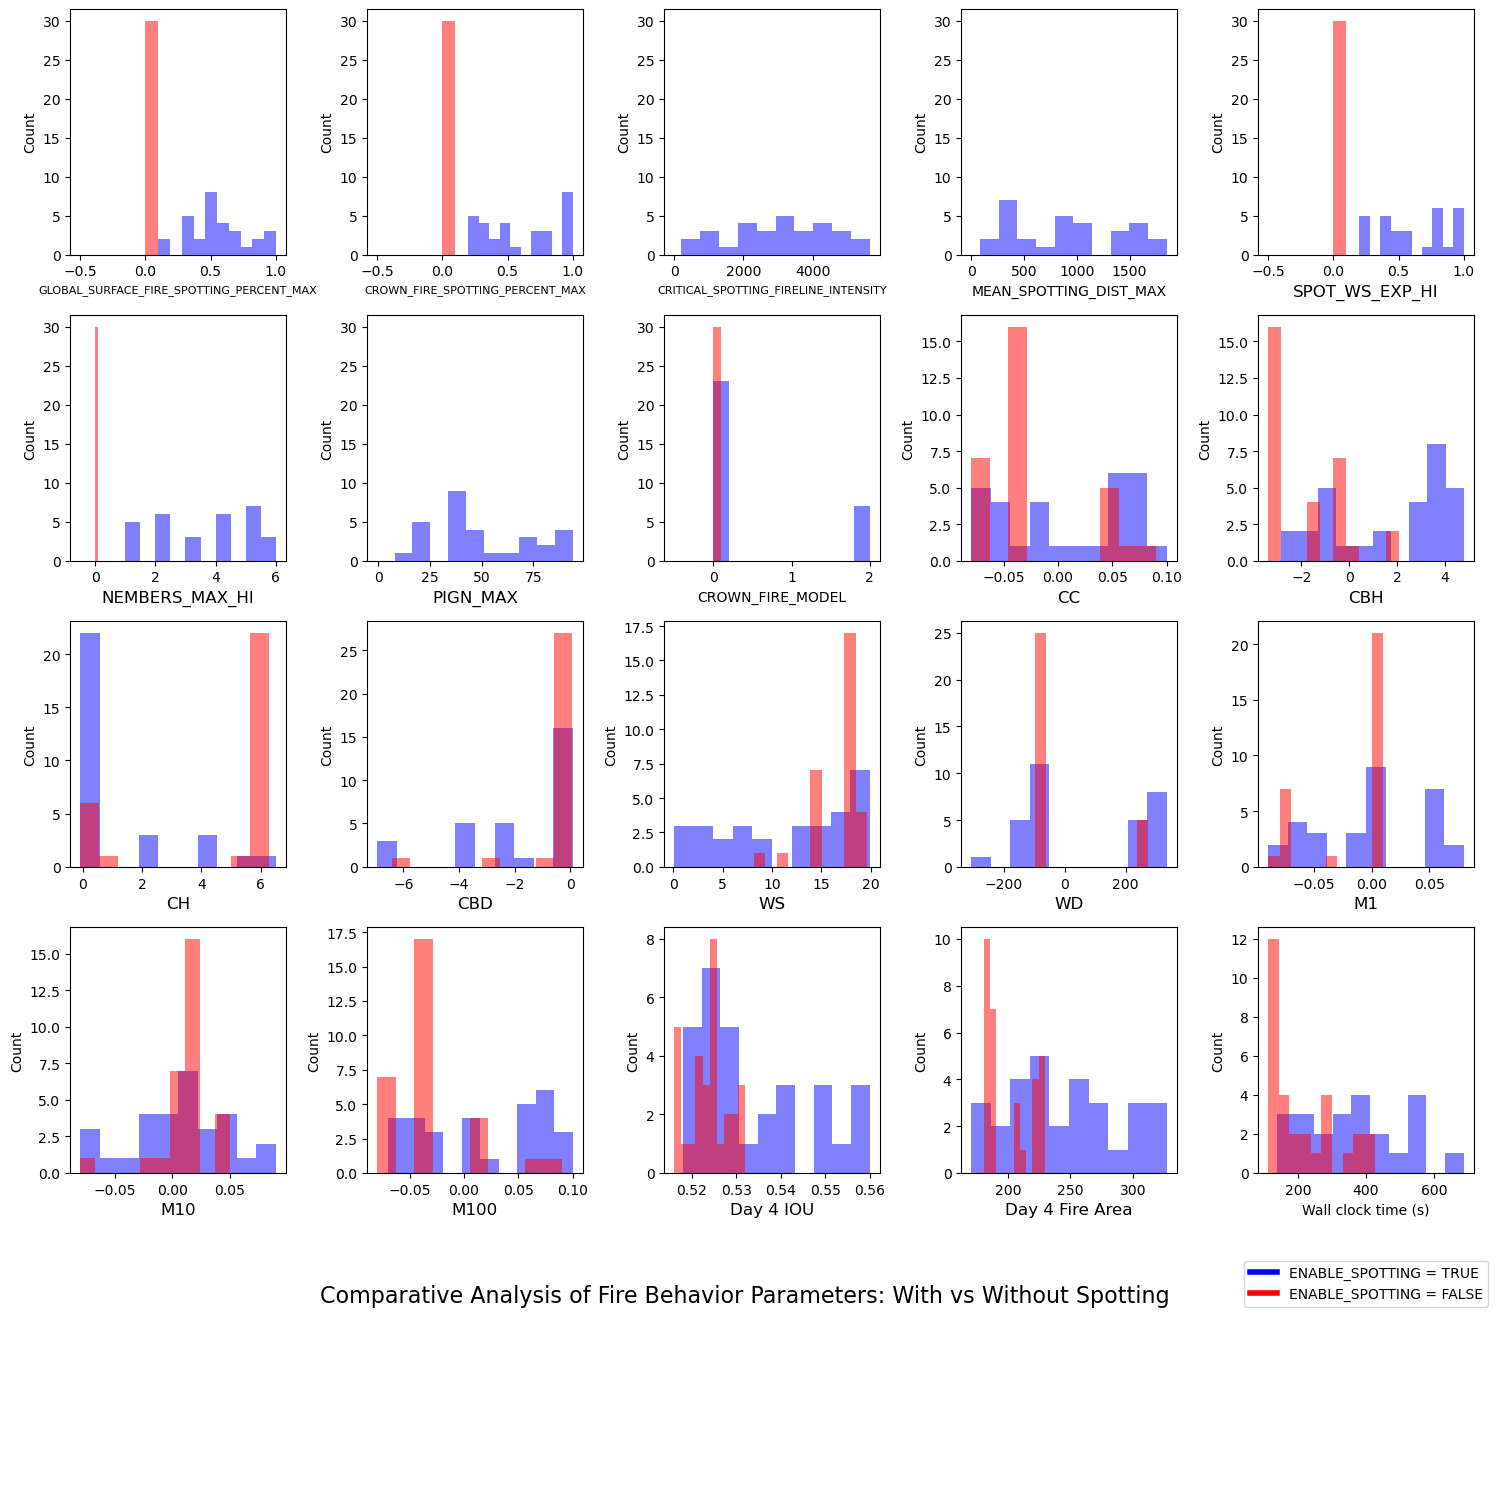

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (for illustrative purposes; replace with your df_perim)
# df_perim = pd.DataFrame({
#     'ENABLE_SPOTTING': ['.TRUE.', '.TRUE.', '.FALSE.', '.FALSE.'],
#     'Day 8 IOU': [0.5, 0.7, 0.6, 0.8],
#     'other_col': [1, 2, 3, 4],
#     # Add other sample columns from param_cols
# })

param_cols = [
    'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
    'CROWN_FIRE_SPOTTING_PERCENT_MAX',
    'CRITICAL_SPOTTING_FIRELINE_INTENSITY',
    'MEAN_SPOTTING_DIST_MAX', 
    'SPOT_WS_EXP_HI', 
    'NEMBERS_MAX_HI', 'PIGN_MAX', 'CROWN_FIRE_MODEL', 'CC', 'CBH',
    'CH', 'CBD', "WS", "WD", 'M1', 'M10', 'M100', 'Day 8 IOU', 'Day 8 Fire Area', 'Wall clock time (s)'
]

spotting_col = [    'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
    'CROWN_FIRE_SPOTTING_PERCENT_MAX',
    'CRITICAL_SPOTTING_FIRELINE_INTENSITY',
    'MEAN_SPOTTING_DIST_MAX', 
    'SPOT_WS_EXP_HI', 'SPOT_FLIN_EXP_HI', 
    'NEMBERS_MAX_HI', 'PIGN_MAX']

import numpy as np
import matplotlib.pyplot as plt

group_true = df_perim[df_perim['ENABLE_SPOTTING'] == '.TRUE.']
group_false = df_perim[df_perim['ENABLE_SPOTTING'] == '.FALSE.']

# Taking top 30 'Day 8 IOU' values for both groups
samp=30
group_true = group_true.nlargest(samp, 'Day 8 IOU')
group_false = group_false.nlargest(samp, 'Day 8 IOU')

n = len(param_cols)
side_length = int(np.ceil(np.sqrt(n)))


def dynamic_title_size(title):
    """Adjust font size based on title length."""
    if len(title) <= 15:
        return 12
    elif len(title) <= 25:
        return 10
    else:
        return 8

fig, axes = plt.subplots(side_length, side_length, figsize=(15, 15))

for ax, col in zip(axes.ravel(), param_cols):
    bins_range = 10
    
    ax.hist(group_true[col], color='blue', alpha=0.5, bins=bins_range)
    ax.hist(group_false[col], color='red', alpha=0.5, bins=bins_range)

    ax.set_ylabel('Count')
    # Special naming cases
    name_mapping = {
        "Day 8 IOU": "Day 4 IOU",
        "Day 8 Fire Area": "Day 4 Fire Area"
    }

    # Use the mapping if it exists, otherwise use the original column name
    display_name = name_mapping.get(col, col)

    ax.set_xlabel(display_name, fontsize=dynamic_title_size(display_name))
    #ax.set_title(f'{display_name}', fontsize=dynamic_title_size(display_name))

# If there are any additional subplots (because our grid might not be a perfect square for our number of histograms),
# we can hide them:
for i in range(n, side_length * side_length):
    axes.ravel()[i].axis('off')

# Set a descriptive figure title

# Add a single legend for the entire figure in the bottom right corner
# Set a legend for the entire figure
handles = [plt.Line2D([0], [0], color='blue', lw=4, label='ENABLE_SPOTTING = TRUE'),
           plt.Line2D([0], [0], color='red', lw=4, label='ENABLE_SPOTTING = FALSE')]

# Adjust layout to ensure that the main title doesn't overlap with the subplots
plt.tight_layout()

fig.suptitle("Comparative Analysis of Fire Behavior Parameters: With vs Without Spotting", fontsize=16, y=.14)
#fig.legend(handles=handles, loc='lower right')
fig.legend(handles=handles, loc='lower right', bbox_to_anchor=(1, 0.12))  # bbox_to_anchor will adjust the position
plt.show()

In [127]:
df_perim['CROWN_FIRE_MODEL']

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
3835    2.0
3836    2.0
3837    2.0
3838    2.0
3839    2.0
Name: CROWN_FIRE_MODEL, Length: 3840, dtype: float64

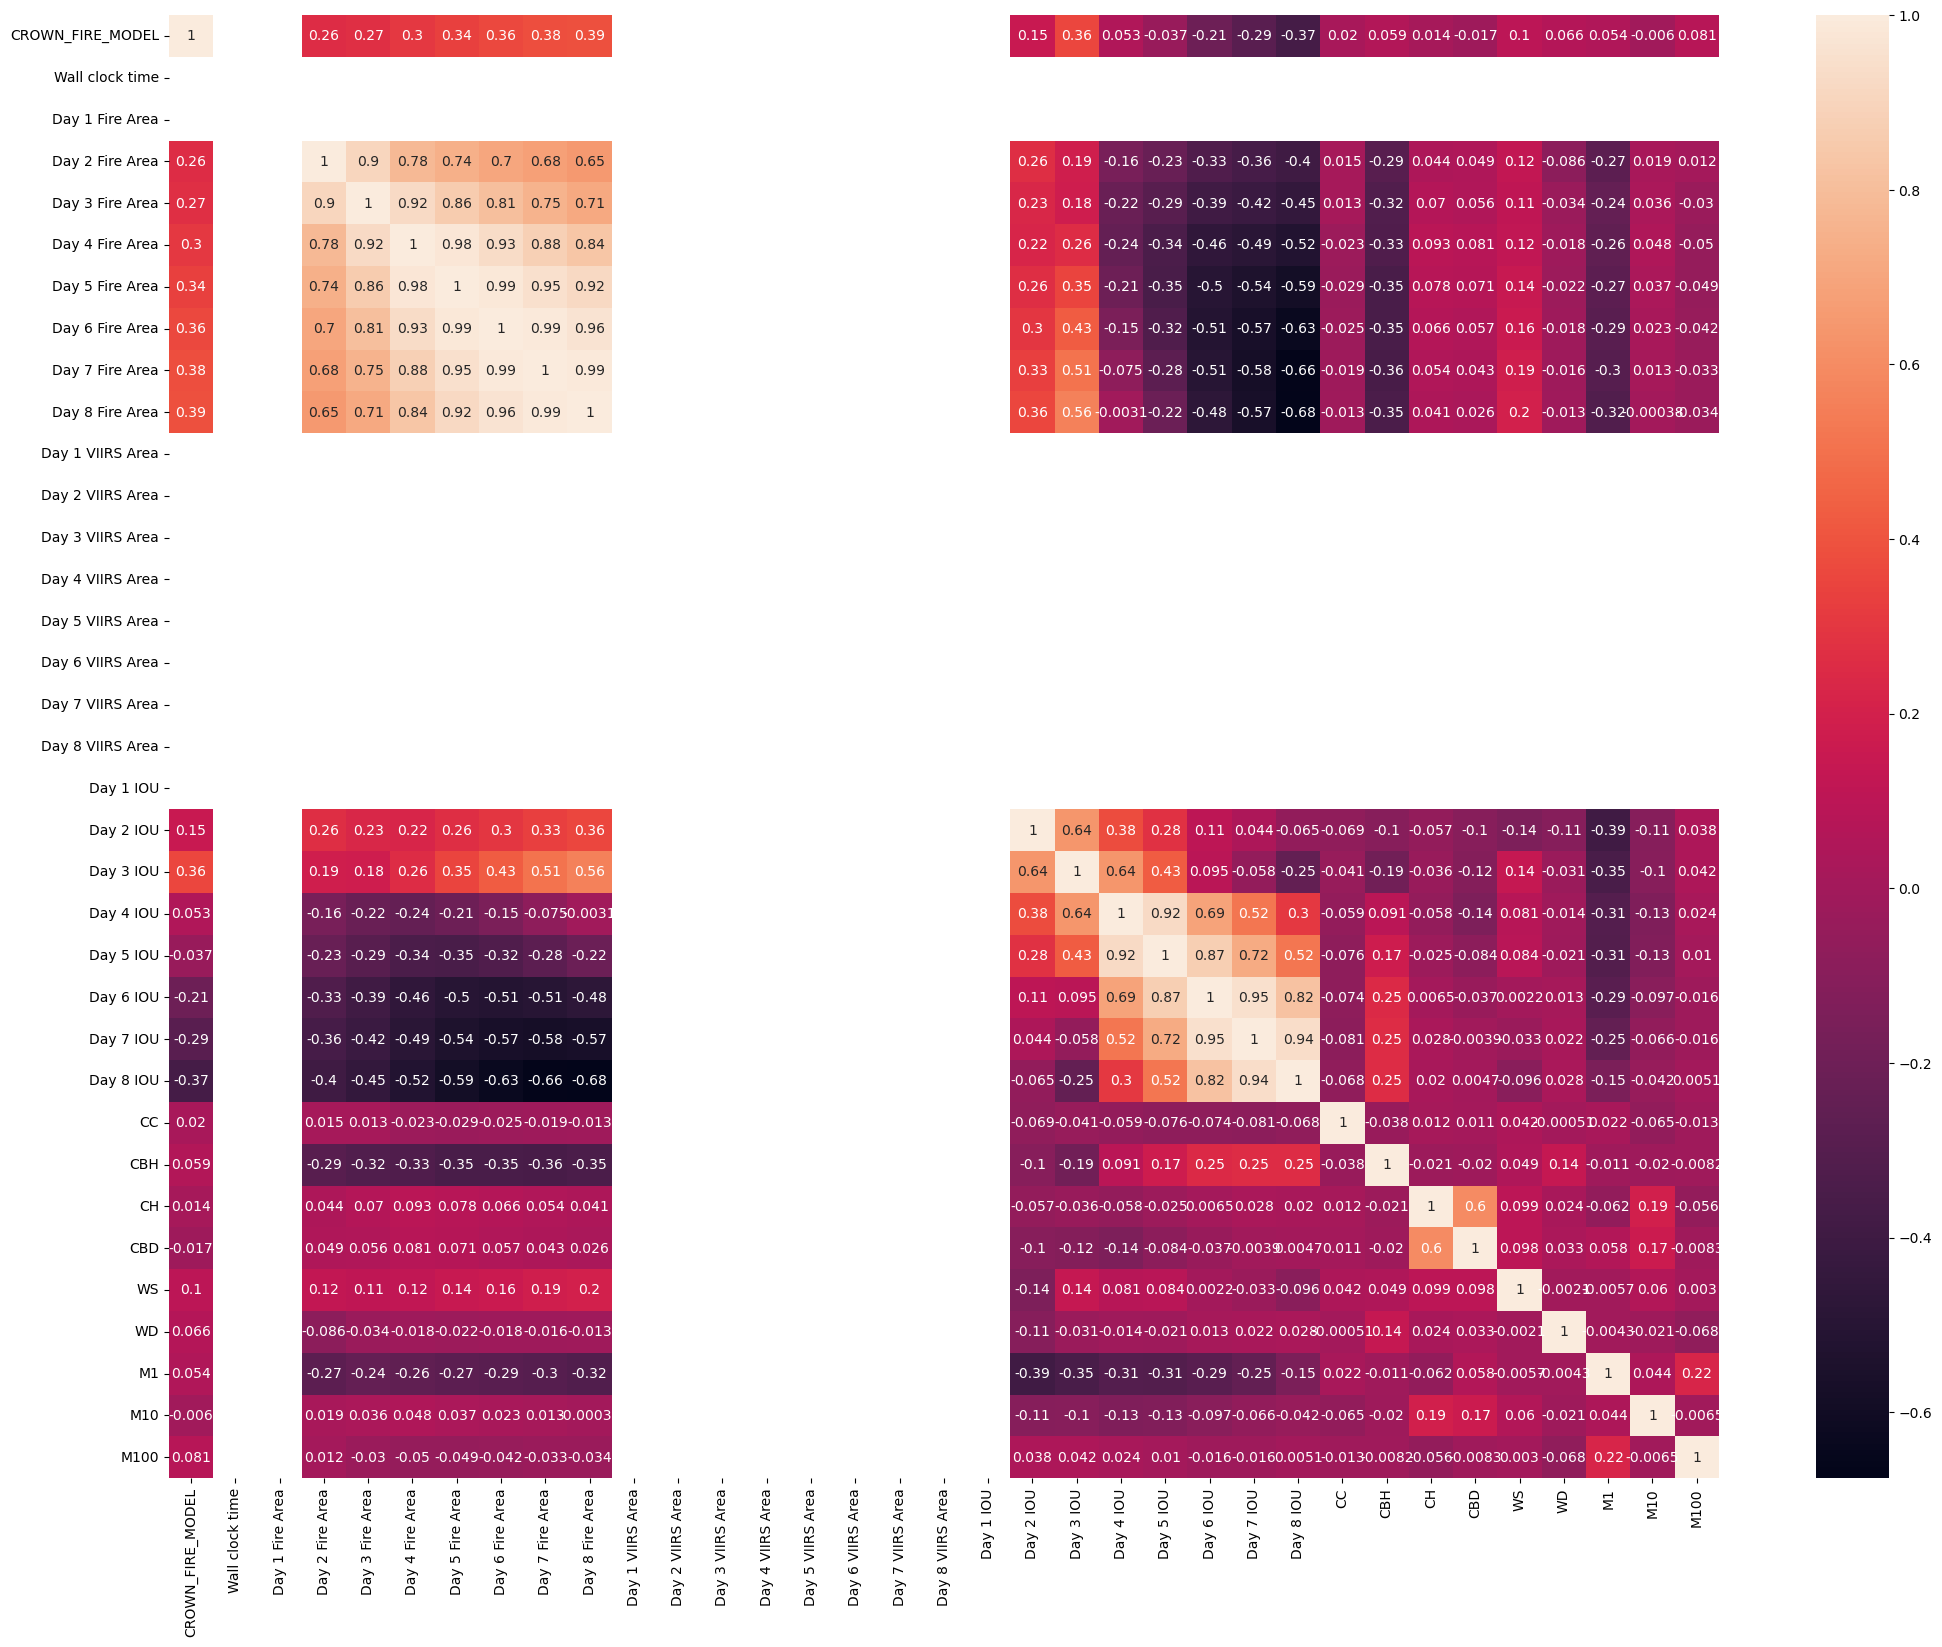

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_perim is defined earlier in your code
correlation_matrix = df_perim.corr()

# Set the figure size
plt.figure(figsize=(25, 19))  # Adjust the values as needed

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True)

# Display the plot
plt.show()


Variance explained by PCA 1: 35.44%
Variance explained by PCA 2: 10.08%
Total variance explained by first 2 components: 45.52%


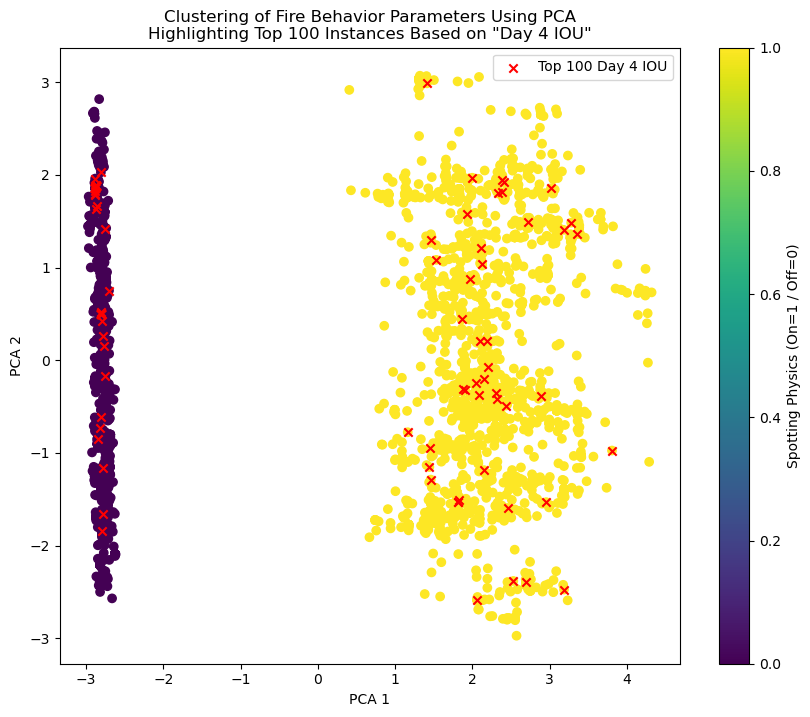

In [185]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df_perim['spotting_binary'] = df_perim['ENABLE_SPOTTING'].map({'.FALSE.': 0, '.TRUE.': 1})

param_cols = [
       'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MIN',
       'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
       'CROWN_FIRE_SPOTTING_PERCENT_MIN', 'CROWN_FIRE_SPOTTING_PERCENT_MAX',
       'CRITICAL_SPOTTING_FIRELINE_INTENSITY', 'MEAN_SPOTTING_DIST_MIN',
       'MEAN_SPOTTING_DIST_MAX', 'SPOT_WS_EXP_LO',
       'SPOT_WS_EXP_HI', 'SPOT_FLIN_EXP_LO', 'SPOT_FLIN_EXP_HI', 'NEMBERS_MIN',
       'NEMBERS_MAX_LO', 'NEMBERS_MAX_HI', 'PIGN_MIN', 'PIGN_MAX', 'CC', 'CBH',
       'CH', 'CBD',"WS", "WD", 'M1', 'M10', 'M100']
scaler = StandardScaler()
df_perim_temp = df_perim[df_perim['Day 8 Fire Area'] > 100.0].reset_index()
indices_to_drop = [1005, 1006]
df_perim_temp = df_perim_temp.drop(indices_to_drop)

df_perim_scaled = scaler.fit_transform(df_perim_temp[param_cols])

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_perim_scaled)

explained_var = pca.explained_variance_ratio_
print(f"Variance explained by PCA 1: {explained_var[0] * 100:.2f}%")
print(f"Variance explained by PCA 2: {explained_var[1] * 100:.2f}%")
print(f"Total variance explained by first 2 components: {(explained_var[0] + explained_var[1]) * 100:.2f}%")


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_pca)

plt.figure(figsize=(10, 8))  # Adjust the figsize values as needed
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_perim_temp['spotting_binary'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering of Fire Behavior Parameters Using PCA\nHighlighting Top 100 Instances Based on "Day 4 IOU"')

cbar = plt.colorbar()
cbar.set_label('Spotting Physics (On=1 / Off=0)')

top_100_iou_indices = df_perim_temp['Day 8 IOU'].nlargest(100).index
plt.scatter(df_pca[top_100_iou_indices, 0], df_pca[top_100_iou_indices, 1], c='red', marker='x', label='Top 100 Day 4 IOU')

plt.legend()
plt.show()


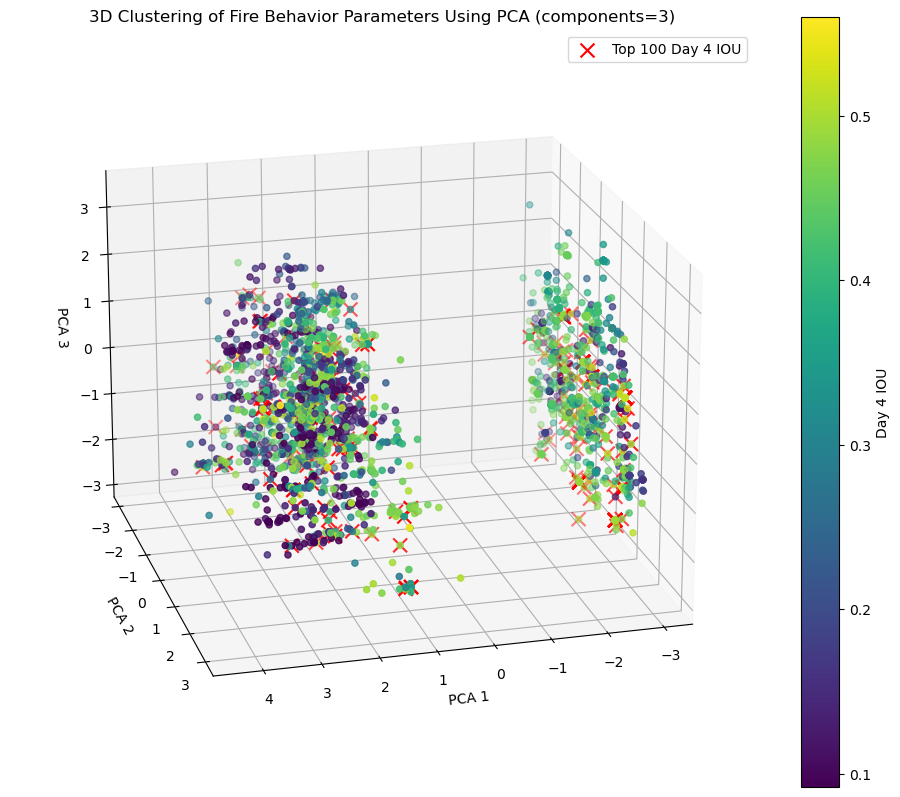

In [159]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Existing code remains the same until...
# ...

# Use the first three principal components for 3D plotting
x = df_pca[:, 0]
y = df_pca[:, 1]
z = df_pca[:, 2]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')  # 3D projection
ax.view_init(elev=20, azim=75)  # Adjust elev and azim as needed

# Scatter plot using PCA components and color-coded based on 'Day 8 Fire Area'
scatter = ax.scatter(x, y, z, c=df_perim_temp['Day 8 IOU'], cmap='viridis', depthshade=True)

# Highlighting the top 100 instances based on "Day 4 IOU"
ax.scatter(x[top_100_iou_indices], y[top_100_iou_indices], z[top_100_iou_indices], 
           c='red', marker='x', s=100, label='Top 100 Day 4 IOU')  # s=100 sets the size

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D Clustering of Fire Behavior Parameters Using PCA (components=3)')

# Colorbar
cbar = fig.colorbar(scatter, ax=ax, orientation="vertical", pad=0.05)
cbar.set_label('Day 4 IOU')

plt.legend()
plt.show()


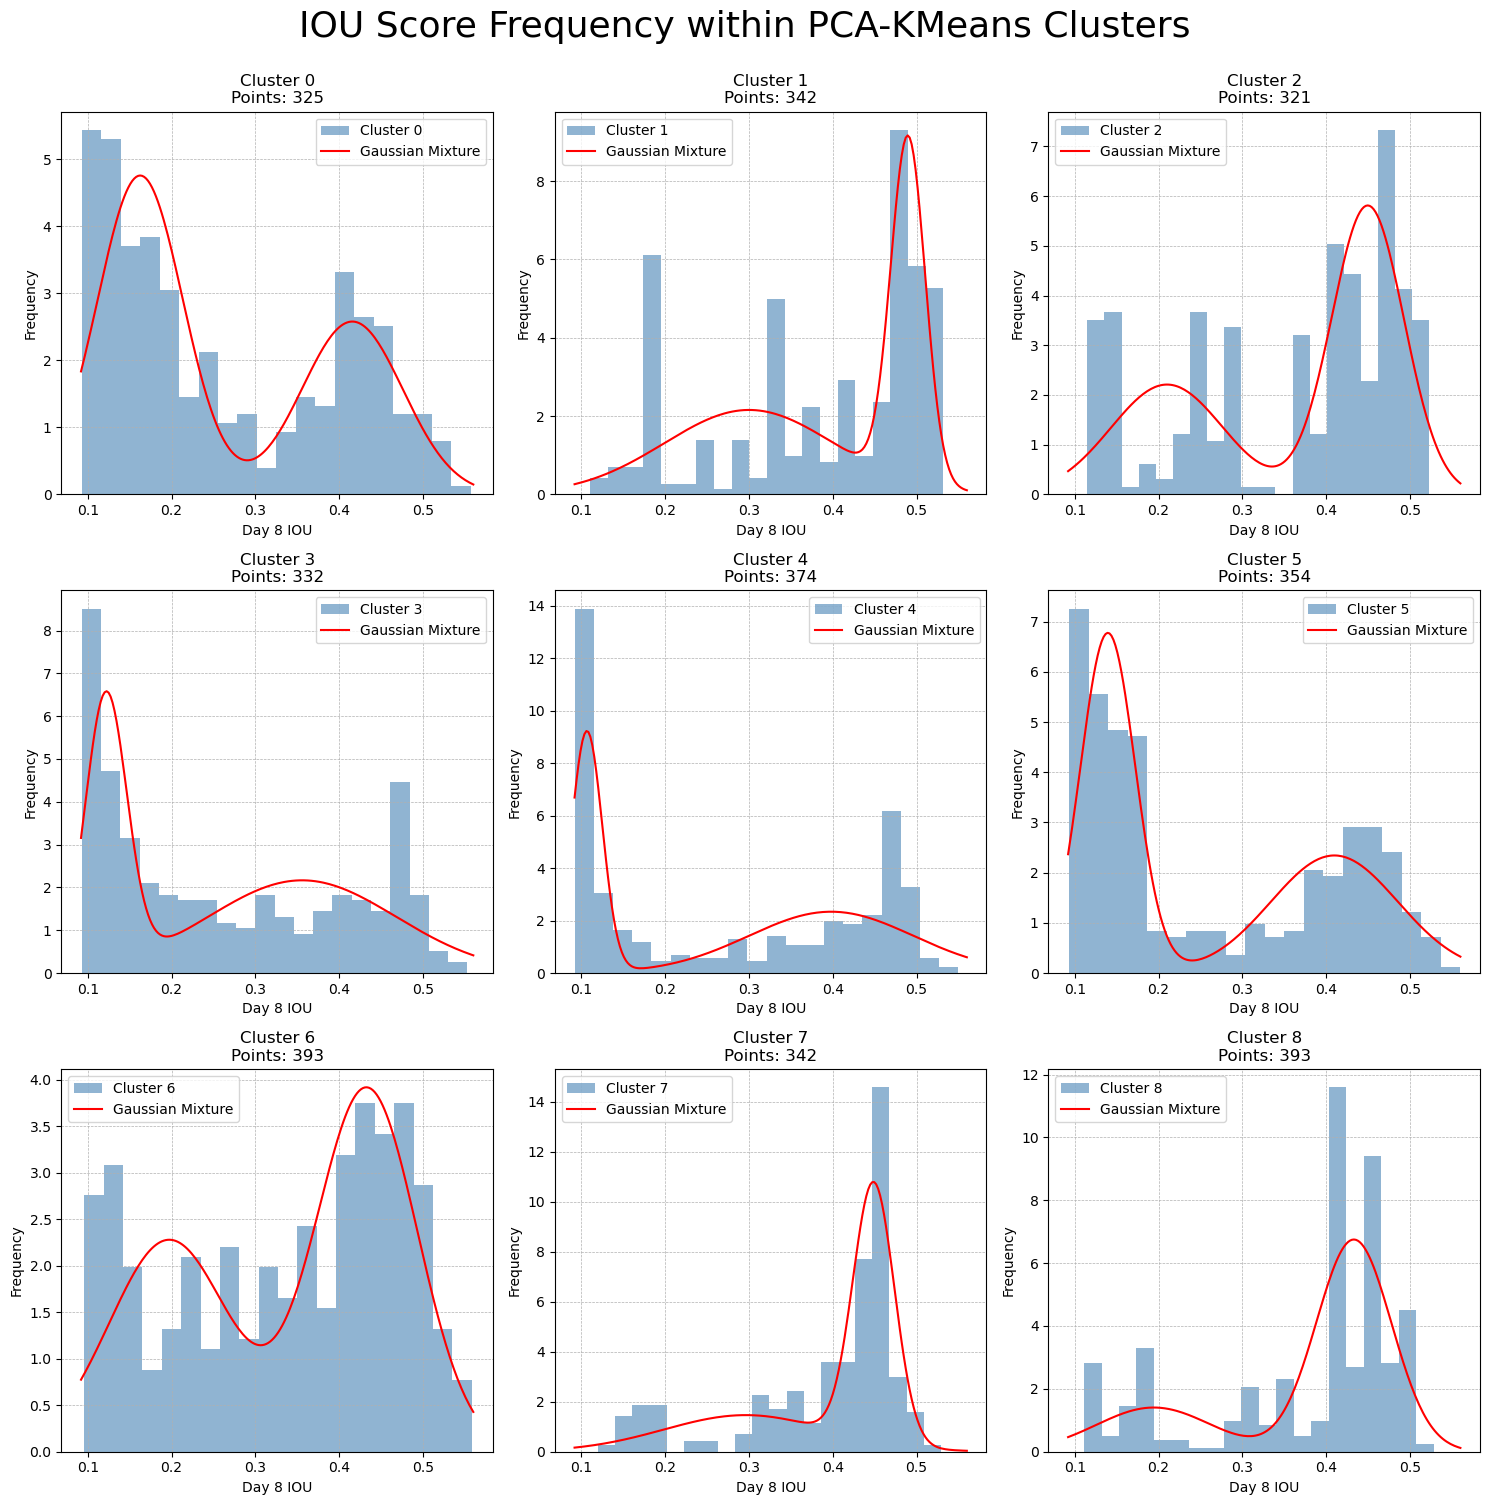

In [183]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from math import ceil, sqrt


# Compute the PCA transformation
n_components = 15
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_perim_scaled)

# Elbow method for inertia
inertias = []
max_clusters = 20
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Inertia vs Number of Clusters', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Assuming the optimal cluster number based on the elbow plot
optimal_clusters = 9 # Adjust this based on your observation

kmeans = KMeans(n_clusters=optimal_clusters)
clusters = kmeans.fit_predict(df_pca)

# Plotting the distributions with Gaussian Mixture overlays
grid_size = ceil(sqrt(optimal_clusters))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

x = np.linspace(df_perim_temp['Day 8 IOU'].min(), df_perim_temp['Day 8 IOU'].max(), 200)  # x values for fitting the curve

for cluster_label, ax in enumerate(axes.ravel()):
    if cluster_label < optimal_clusters:
        cluster_iou = df_perim_temp.loc[clusters == cluster_label, 'Day 8 IOU']
        
        # Histogram
        ax.hist(cluster_iou, bins=20, alpha=0.6, label=f'Cluster {cluster_label}', color='steelblue', density=True)
        
        # Gaussian Mixture
        gm = GaussianMixture(n_components=2, random_state=0)
        gm.fit(cluster_iou.values.reshape(-1, 1))
        
        # Calculate the PDFs for the two Gaussian components
        p1 = gm.weights_[0] * np.exp(-0.5 * ((x - gm.means_[0]) ** 2) / gm.covariances_[0].ravel()) / np.sqrt(2 * np.pi * gm.covariances_[0].ravel())
        p2 = gm.weights_[1] * np.exp(-0.5 * ((x - gm.means_[1]) ** 2) / gm.covariances_[1].ravel()) / np.sqrt(2 * np.pi * gm.covariances_[1].ravel())
        
        ax.plot(x, p1 + p2, 'r-', label="Gaussian Mixture")
        
        title = f"Cluster {cluster_label}\nPoints: {len(cluster_iou)}"
        ax.set_title(title, fontsize=12)
        ax.set_xlabel('Day 8 IOU', fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.legend()
    else:
        ax.axis('off')  # Turn off the axes for extra subplots
fig.suptitle("IOU Score Frequency within PCA-KMeans Clusters", fontsize=26, y=1.0)

plt.tight_layout()
plt.show()

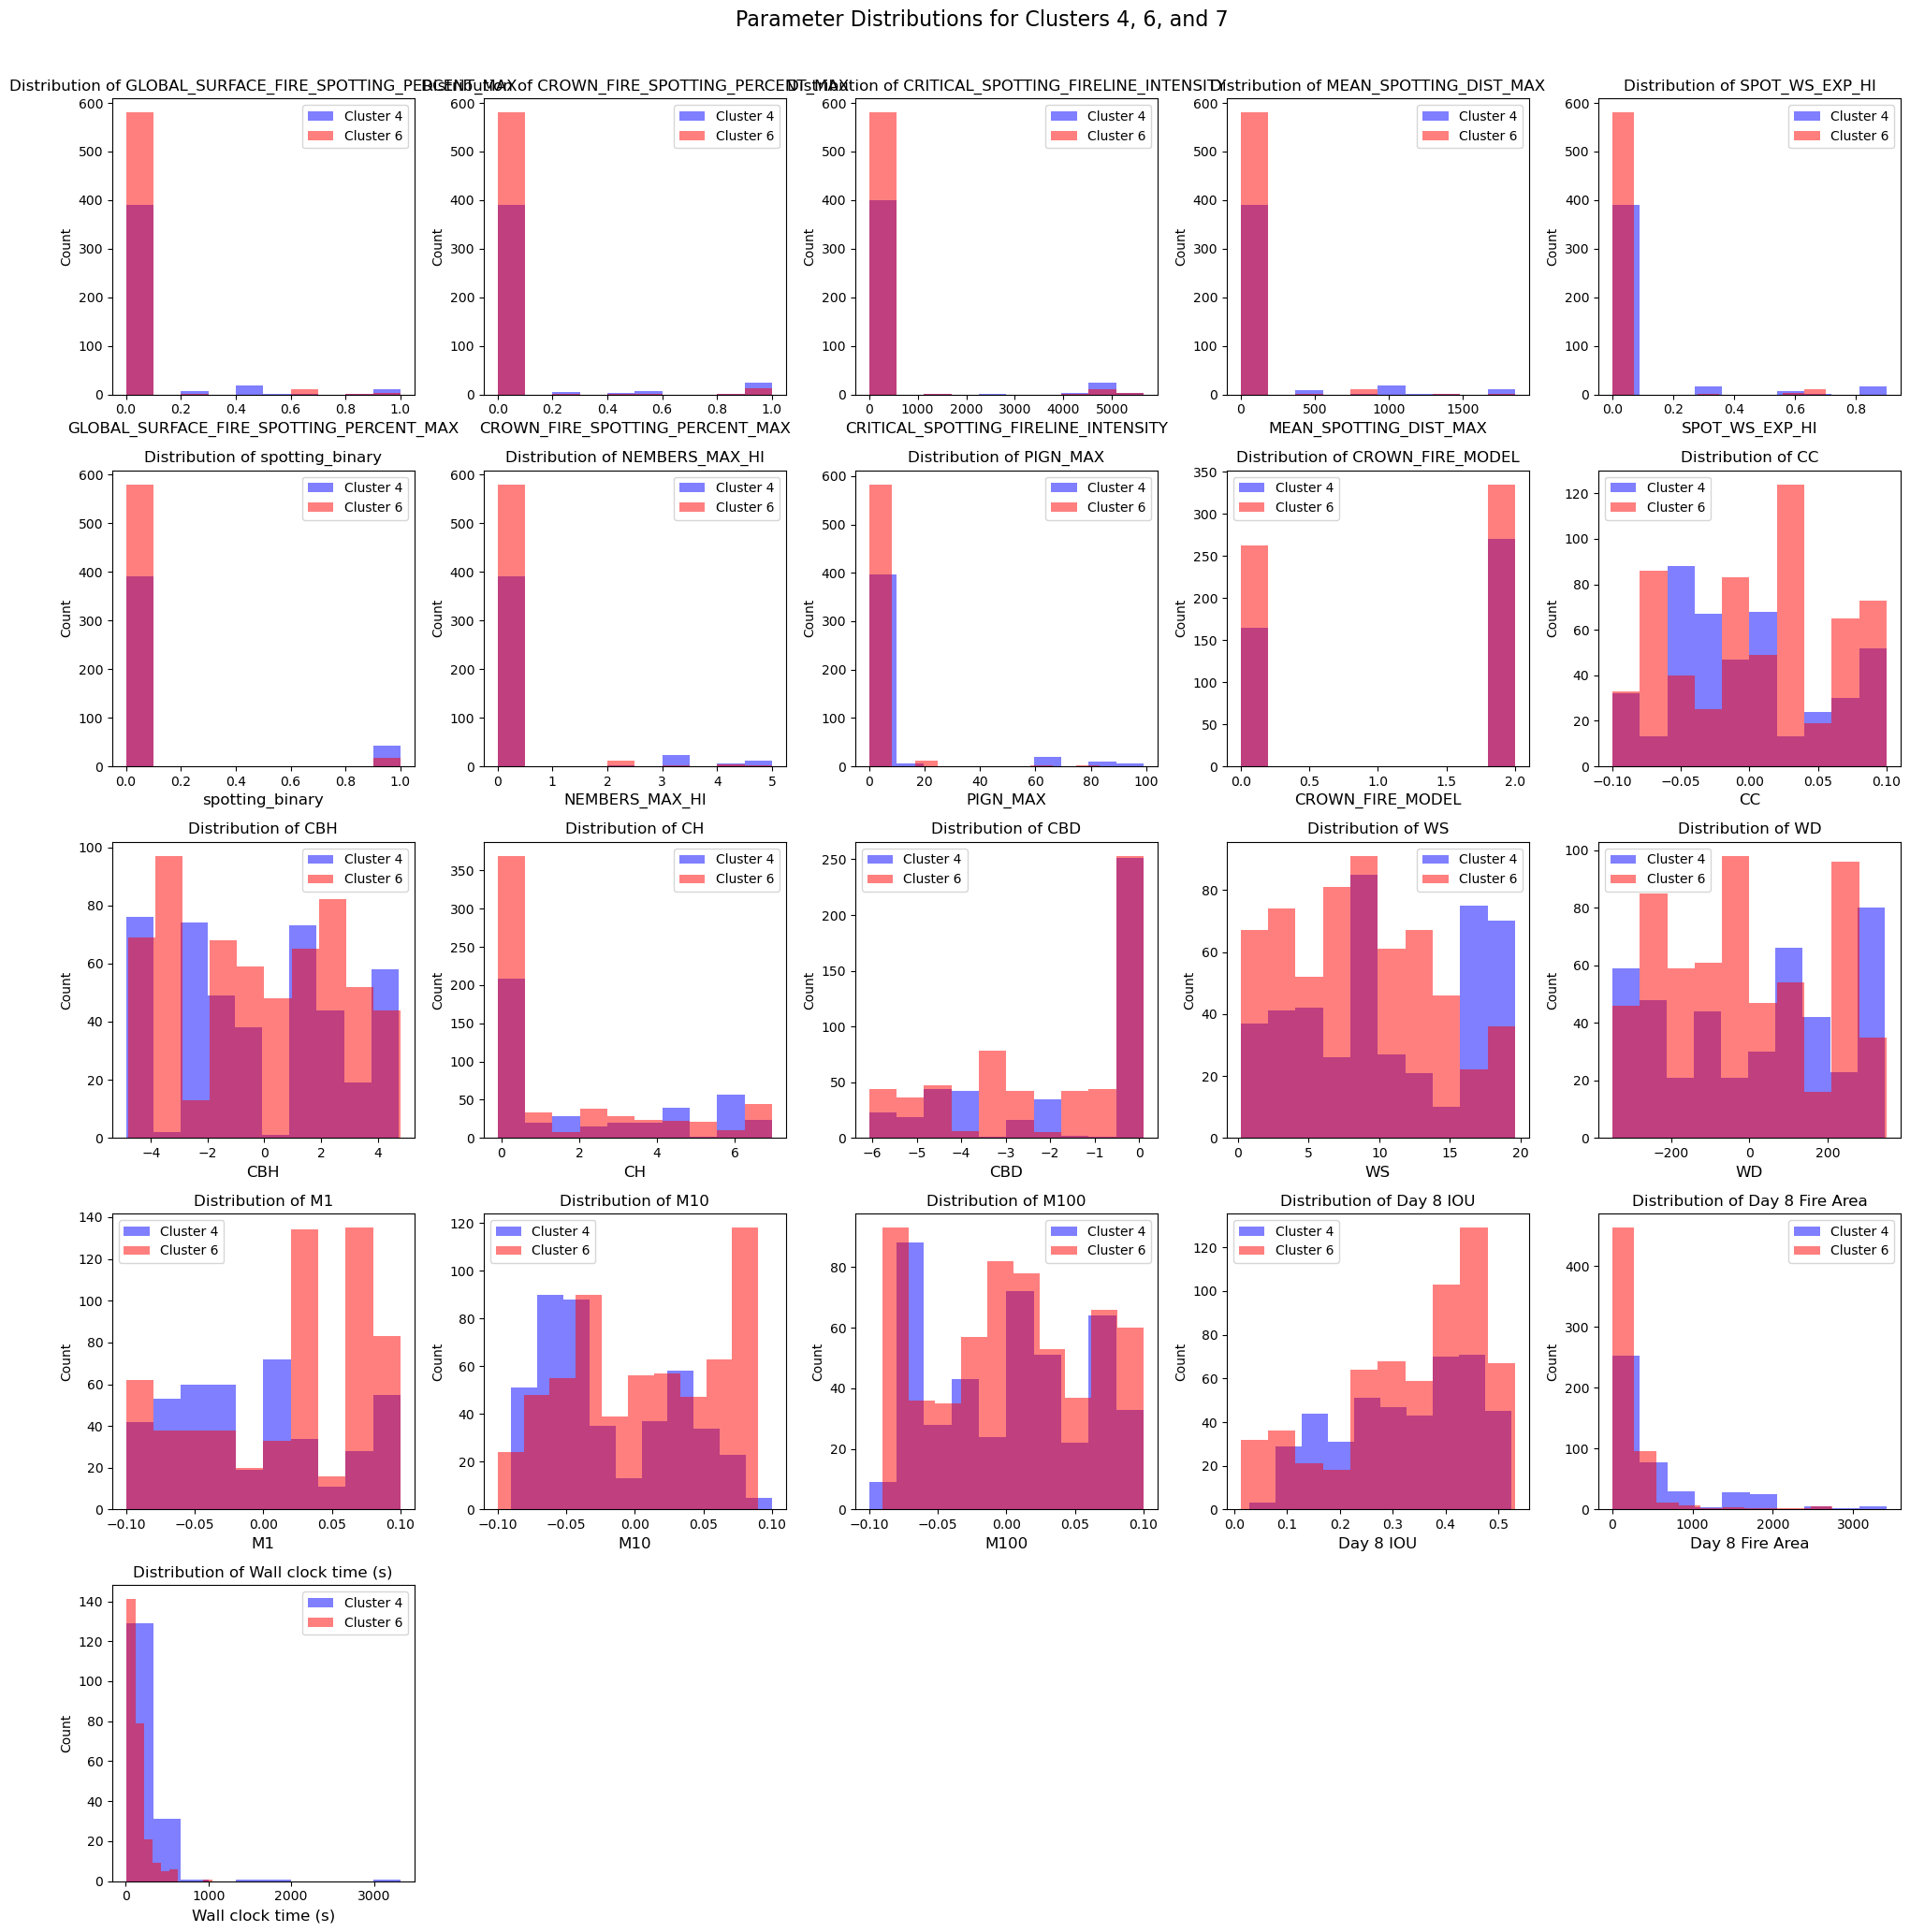

In [177]:
param_cols = [
    'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
    'CROWN_FIRE_SPOTTING_PERCENT_MAX',
    'CRITICAL_SPOTTING_FIRELINE_INTENSITY',
    'MEAN_SPOTTING_DIST_MAX', 
    'SPOT_WS_EXP_HI', 'spotting_binary', 
    'NEMBERS_MAX_HI', 'PIGN_MAX', 'CROWN_FIRE_MODEL', 'CC', 'CBH',
    'CH', 'CBD', "WS", "WD", 'M1', 'M10', 'M100', 'Day 8 IOU', 'Day 8 Fire Area', 'Wall clock time (s)'
]


# Collecting the indices for clusters 4, 6, and 7
indices_cluster_4 = np.where(clusters == 0)[0]
indices_cluster_6 = np.where(clusters == 2)[0]
indices_cluster_7 = np.where(clusters == 5)[0]

# Extract data for each cluster
cluster_4_data = df_perim.iloc[indices_cluster_4]
cluster_6_data = df_perim.iloc[indices_cluster_6]
cluster_7_data = df_perim.iloc[indices_cluster_7]

# Setup for plotting
n = len(param_cols)
side_length = int(np.ceil(np.sqrt(n)))

fig, axes = plt.subplots(side_length, side_length, figsize=(20, 20))

for ax, col in zip(axes.ravel(), param_cols):
    bins_range = 10

    ax.hist(cluster_4_data[col], color='blue', alpha=0.5, bins=bins_range, label='Cluster 4')
    ax.hist(cluster_6_data[col], color='red', alpha=0.5, bins=bins_range, label='Cluster 6')
    #ax.hist(cluster_7_data[col], color='green', alpha=0.5, bins=bins_range, label='Cluster 7')
    
    ax.set_ylabel('Count')
    ax.set_xlabel(col, fontsize=12)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.legend()

# Hide any additional subplots
for i in range(n, side_length * side_length):
    axes.ravel()[i].axis('off')

# Adjust layout
plt.tight_layout()

fig.suptitle("Parameter Distributions for Clusters 4, 6, and 7", fontsize=16, y=1.03)

plt.show()


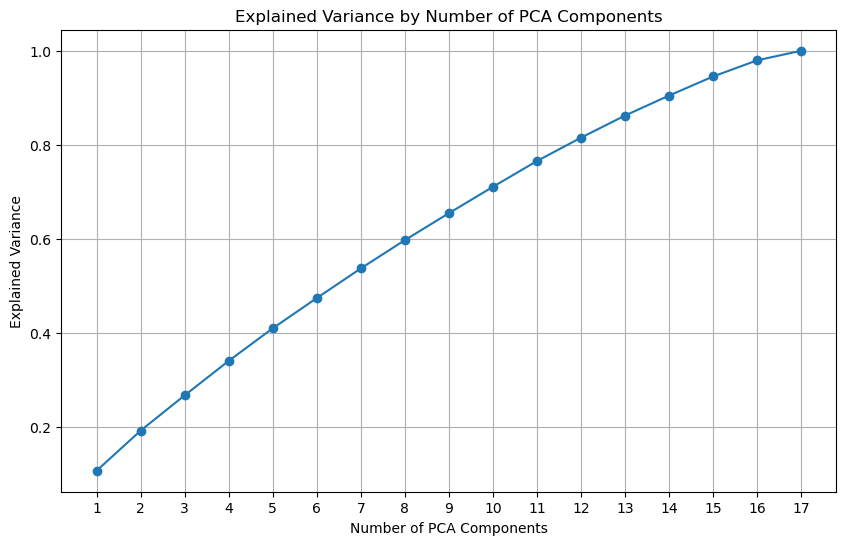

Variance explained by PCA 1: 10.70%
Variance explained by PCA 2: 8.53%
Variance explained by PCA 3: 7.59%
Variance explained by PCA 4: 7.27%
Variance explained by PCA 5: 6.89%
Variance explained by PCA 6: 6.42%
Variance explained by PCA 7: 6.30%
Variance explained by PCA 8: 6.02%
Variance explained by PCA 9: 5.72%
Variance explained by PCA 10: 5.61%
Variance explained by PCA 11: 5.49%
Variance explained by PCA 12: 4.96%
Variance explained by PCA 13: 4.70%
Variance explained by PCA 14: 4.25%
Variance explained by PCA 15: 4.06%
Variance explained by PCA 16: 3.43%
Variance explained by PCA 17: 2.04%
Total variance explained by first 17 components: 100.00%


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
param_cols = [
       'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
       'CROWN_FIRE_SPOTTING_PERCENT_MAX',
       'CRITICAL_SPOTTING_FIRELINE_INTENSITY',
       'MEAN_SPOTTING_DIST_MAX', 
       'SPOT_WS_EXP_HI',  'SPOT_FLIN_EXP_HI', 
        'NEMBERS_MAX_HI', 'PIGN_MAX', 'CC', 'CBH',
       'CH', 'CBD',"WS", "WD", 'M1', 'M10', 'M100']

# Perform PCA for different numbers of components
num_components = np.arange(1, len(param_cols) + 1)
explained_variance = []

for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(df_perim_scaled)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_components, explained_variance, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.xticks(num_components)
plt.grid(True)
plt.show()

explained_var = pca.explained_variance_ratio_

for i in range(17):
    print(f"Variance explained by PCA {i+1}: {explained_var[i] * 100:.2f}%")

print(f"Total variance explained by first 17 components: {sum(explained_var[:17]) * 100:.2f}%")


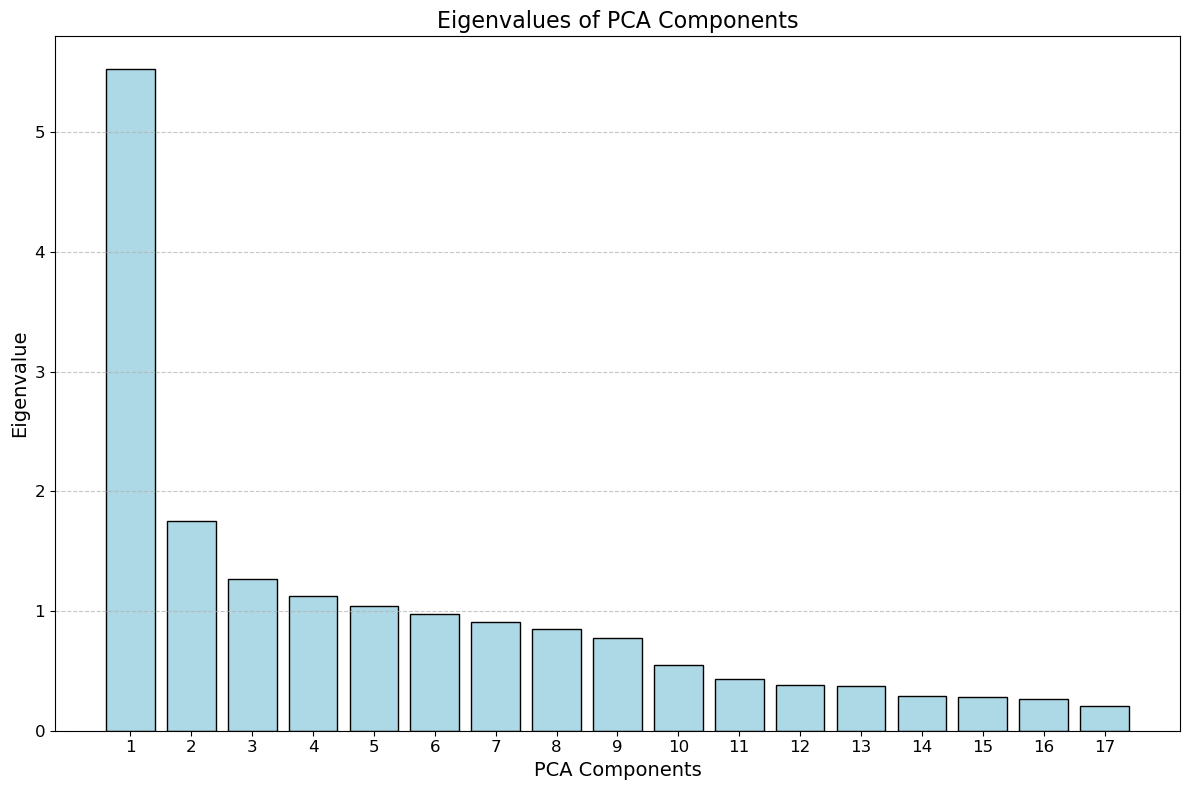

Variance explained by PCA 1: 32.49%
Variance explained by PCA 2: 10.31%
Variance explained by PCA 3: 7.45%
Variance explained by PCA 4: 6.63%
Variance explained by PCA 5: 6.13%
Variance explained by PCA 6: 5.74%
Variance explained by PCA 7: 5.36%
Variance explained by PCA 8: 4.99%
Variance explained by PCA 9: 4.53%
Variance explained by PCA 10: 3.25%
Variance explained by PCA 11: 2.54%
Variance explained by PCA 12: 2.27%
Variance explained by PCA 13: 2.19%
Variance explained by PCA 14: 1.69%
Variance explained by PCA 15: 1.68%
Variance explained by PCA 16: 1.54%
Variance explained by PCA 17: 1.20%
Total variance explained by first 17 components: 100.00%


In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

param_cols = [
    'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
    'CROWN_FIRE_SPOTTING_PERCENT_MAX',
    'CRITICAL_SPOTTING_FIRELINE_INTENSITY',
    'MEAN_SPOTTING_DIST_MAX',
    'SPOT_WS_EXP_HI', 'SPOT_FLIN_EXP_HI',
    'NEMBERS_MAX_HI', 'PIGN_MAX', 'CC', 'CBH',
    'CH', 'CBD', "WS", "WD", 'M1', 'M10', 'M100'
]

# Standardize the data before performing PCA
scaler = StandardScaler()
df_perim_scaled = scaler.fit_transform(df_perim[param_cols])

# Perform PCA with 17 components
pca = PCA(n_components=17)
pca.fit(df_perim_scaled)

explained_var = pca.explained_variance_ratio_

# Create a professional plot of eigenvalues of each PCA component
plt.figure(figsize=(12, 8))
plt.bar(range(1, 18), pca.explained_variance_, color='lightblue', edgecolor='black')
plt.xlabel('PCA Components', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.title('Eigenvalues of PCA Components', fontsize=16)
plt.xticks(range(1, 18), labels=[f'{i}' for i in range(1, 18)], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

for i in range(17):
    print(f"Variance explained by PCA {i+1}: {explained_var[i] * 100:.2f}%")

print(f"Total variance explained by first 17 components: {sum(explained_var[:17]) * 100:.2f}%")


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ... (your code for data preprocessing)
cluster_counts = [sum(clusters == cluster_label) for cluster_label in range(3)]

for cluster_label, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_label}: {count} points")

# Find the cluster with only one point
unique_cluster = None
for cluster_label in range(3):
    if sum(clusters == cluster_label) == 2:
        unique_cluster = cluster_label
        break

if unique_cluster is not None:
    # Find the index of the point in the unique cluster
    unique_cluster_index = df_perim_temp[clusters == unique_cluster].index[0]
    print("Index of the point in the unique cluster:", unique_cluster_index)
else:
    print("No unique cluster with a single point found.")

row = df_perim_temp.iloc[unique_cluster_index]
print(row)

Cluster 0: 1670 points
Cluster 1: 2 points
Cluster 2: 1397 points
Index of the point in the unique cluster: 1005
index                                                                                    1377
Description                                 inputs=inputs_WIND=_SPOTTING=_S-CONFIG=1927-lh...
INPUTS                                                                                 inputs
WIND_CONFIG                                                                                 0
ENABLE_SPOTTING                                                                1927-lhs-large
CROWN_FIRE_MODEL                                                                            2
Wall clock time                                                                           0.0
Day 1 Fire Area                                                                           0.0
Day 2 Fire Area                                                                         4.527
Day 3 Fire Area                          

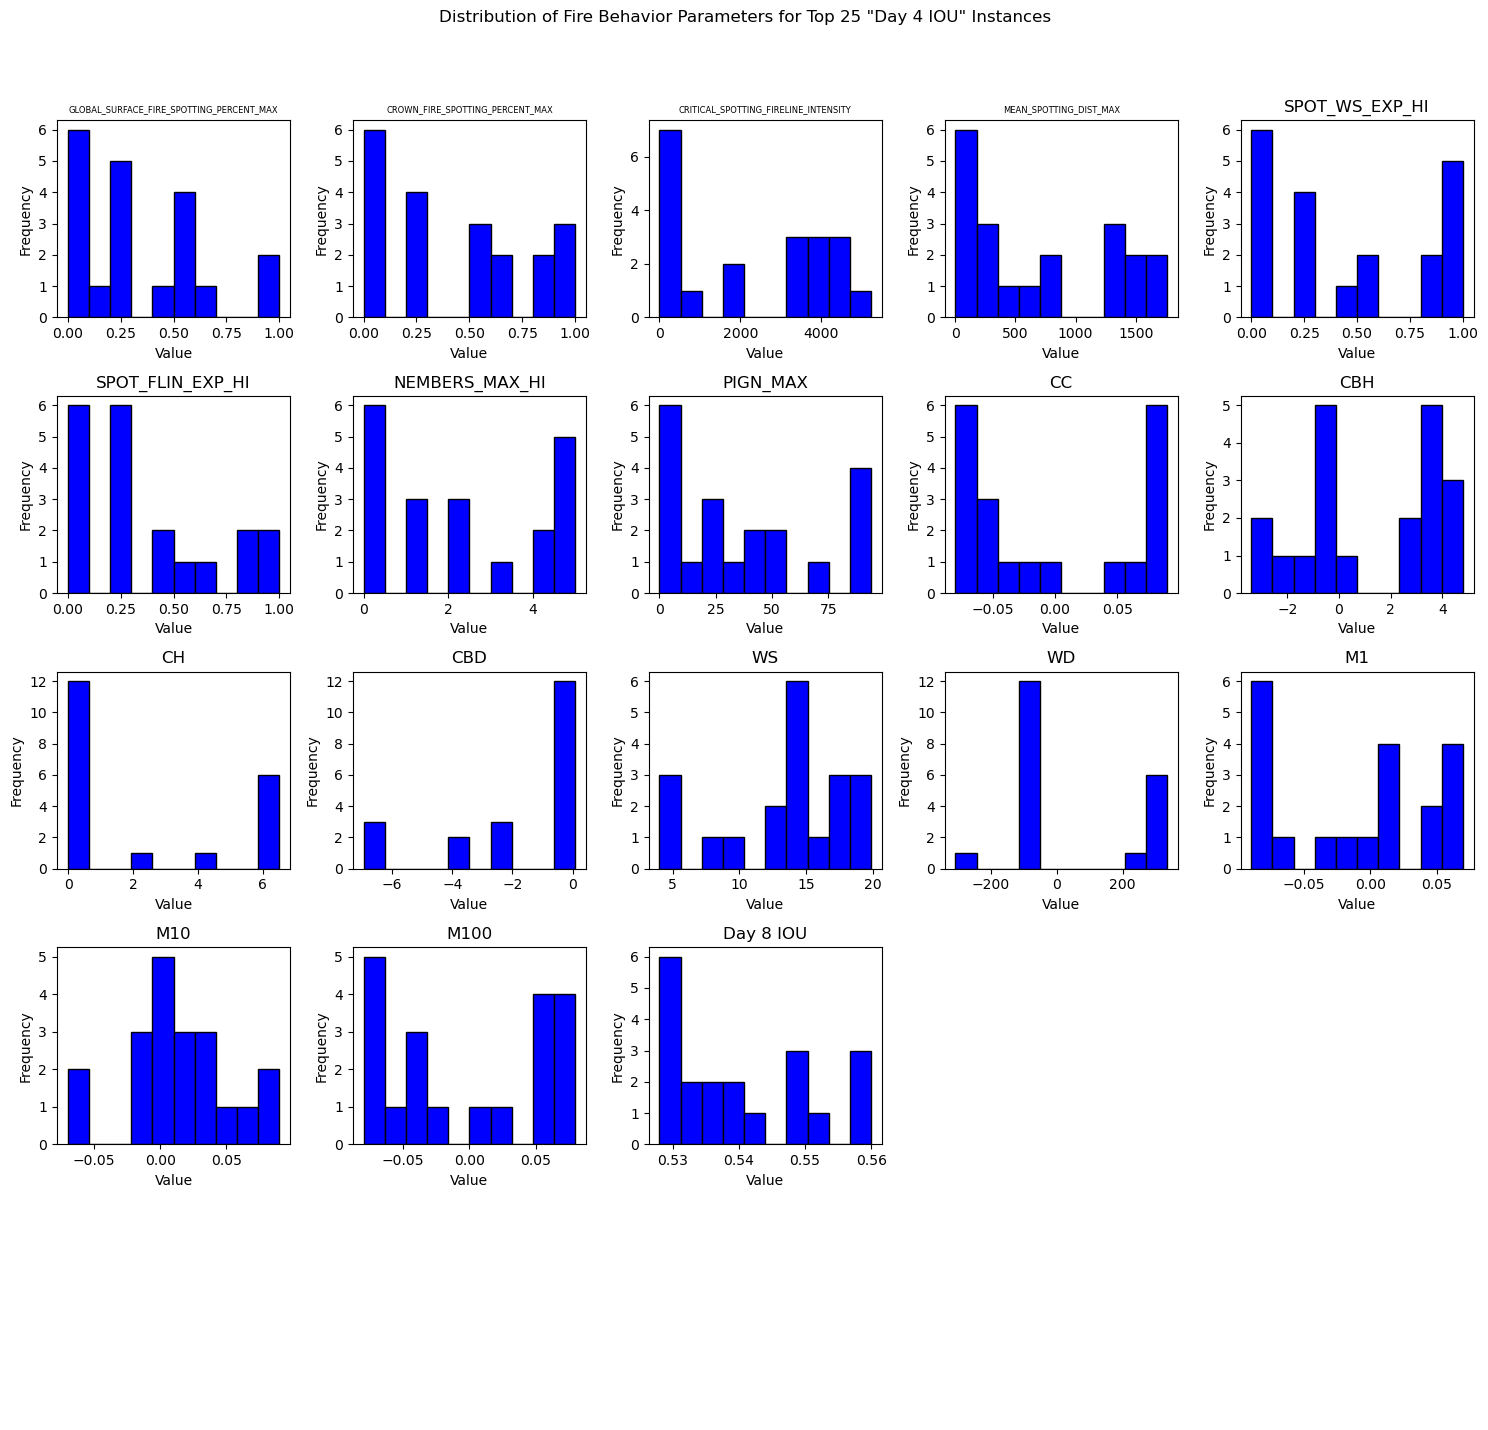

In [49]:
import matplotlib.ticker as ticker
import math

param_cols = [
       'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
       'CROWN_FIRE_SPOTTING_PERCENT_MAX',
       'CRITICAL_SPOTTING_FIRELINE_INTENSITY',
       'MEAN_SPOTTING_DIST_MAX', 
       'SPOT_WS_EXP_HI',  'SPOT_FLIN_EXP_HI', 
        'NEMBERS_MAX_HI', 'PIGN_MAX', 'CC', 'CBH',
       'CH', 'CBD',"WS", "WD", 'M1', 'M10', 'M100']

# Get the top 250 'Day 8 IOU' instances
top_250_iou_indices = df_perim['Day 8 IOU'].nlargest(20).index
param_cols.append('Day 8 IOU')
top_250_df = df_perim.loc[top_250_iou_indices, param_cols]

# Determine the size of the grid
grid_size = int(math.ceil(math.sqrt(len(param_cols))))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
fig.suptitle('Distribution of Fire Behavior Parameters for Top 25 "Day 4 IOU" Instances')

# Flatten the axes for easier indexing
axes_flat = axes.flatten()

# Plot the histograms
for i, col in enumerate(param_cols):
    axes_flat[i].hist(top_250_df[col], bins=10, color='blue', edgecolor='black')
    
    # Set the title with a smaller font size if the text is too long
    title_font_size = 6 if len(col) > 20 else 12
    axes_flat[i].set_title(col, fontsize=title_font_size)
    
    axes_flat[i].set_xlabel('Value')
    axes_flat[i].set_ylabel('Frequency')
    
    # Dynamically reduce the number of x-ticks if there are too many
    # Dynamically reduce the number of x-ticks if there are too many
    if len(axes_flat[i].get_xticks()) > 6:
        locs, _ = plt.xticks()
        plt.xticks(locs, [int(x) for x in locs])
        axes_flat[i].xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))
# Hide any extra subplots
for i in range(len(param_cols), len(axes_flat)):
    axes_flat[i].axis('off')

# Display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [59]:
param_cols = [
       'Description', 'INPUTS', 'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
       'CROWN_FIRE_SPOTTING_PERCENT_MAX',
       'CRITICAL_SPOTTING_FIRELINE_INTENSITY',
       'MEAN_SPOTTING_DIST_MAX', 
       'SPOT_WS_EXP_HI',  'SPOT_FLIN_EXP_HI', 
        'NEMBERS_MAX_HI', 'PIGN_MAX', 'CC', 'CBH',
       'CH', 'CBD',"WS", "WD", 'M1', 'M10', 'M100', 'Day 8 IOU', 'Day 8 Fire Area', 'CROWN_FIRE_MODEL']

# Get the top 250 'Day 8 IOU' instances
top_250_iou_indices = df_perim['Day 8 IOU'].nlargest(20).index
top_250_df = df_perim.loc[top_250_iou_indices, param_cols]
top_250_df.head(40).reset_index()

# top_250_df['Description'] = 'None'
# top_250_df['INPUTS'] = 

top_250_df.to_csv('best_IOU2.csv')

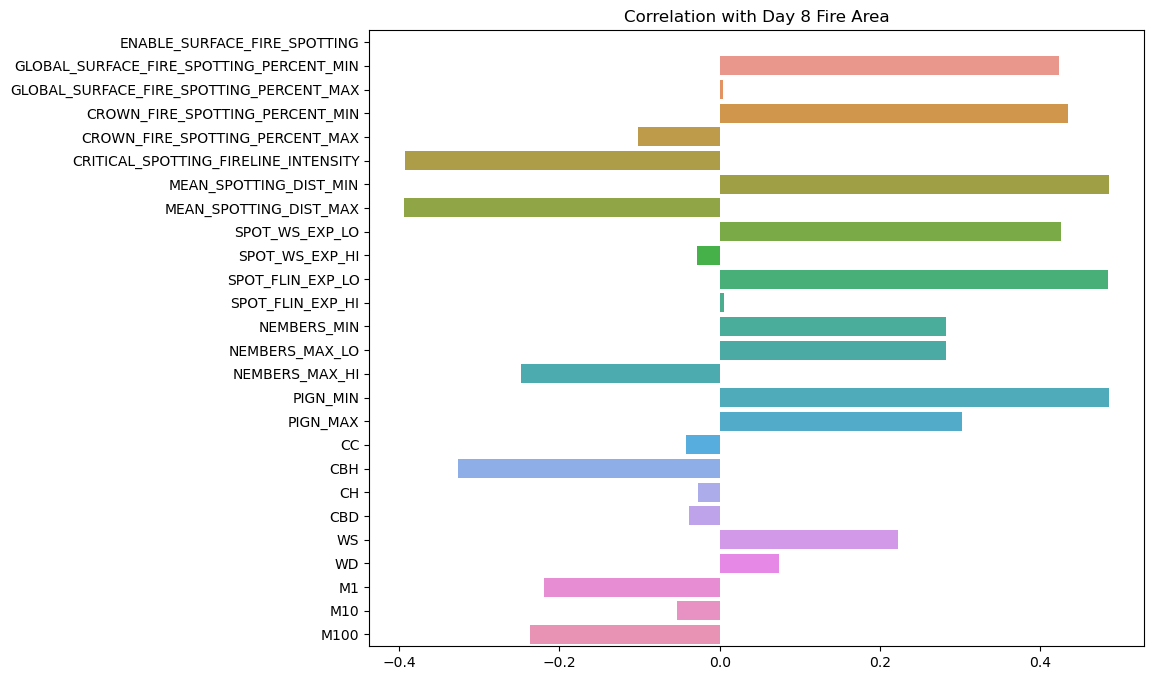

In [200]:
import seaborn as sns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
param_cols = ['ENABLE_SURFACE_FIRE_SPOTTING',
       'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MIN',
       'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
       'CROWN_FIRE_SPOTTING_PERCENT_MIN', 'CROWN_FIRE_SPOTTING_PERCENT_MAX',
       'CRITICAL_SPOTTING_FIRELINE_INTENSITY', 'MEAN_SPOTTING_DIST_MIN',
       'MEAN_SPOTTING_DIST_MAX', 'SPOT_WS_EXP_LO',
       'SPOT_WS_EXP_HI', 'SPOT_FLIN_EXP_LO', 'SPOT_FLIN_EXP_HI', 'NEMBERS_MIN',
       'NEMBERS_MAX_LO', 'NEMBERS_MAX_HI', 'PIGN_MIN', 'PIGN_MAX', 'CC', 'CBH',
       'CH', 'CBD',"WS", "WD", 'M1', 'M10', 'M100']

out = 'Day 8 Fire Area'
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# print(df_perim.head(40))

# # Reset the display options to default
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
# Check data types

# Assuming df_perim is your DataFrame

# Convert columns to float64 if possible, otherwise set them as strings
for col in df_perim.columns:
    try:
        df_perim[col] = pd.to_numeric(df_perim[col], errors='coerce')
        df_perim[col] = df_perim[col].astype(float)
    except ValueError:
        df_perim[col] = df_perim[col].astype(str)
 
#print(df_perim[param_cols + [out]].dtypes)

# Check for missing values
#print(df_perim[param_cols + [out]].isnull().sum())
correlations = df_perim[param_cols + [out]].corr()[out].drop(out)
x=correlations.values
y=correlations.index
print(x)
print(y)

plt.figure(figsize=(10,8))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title(f'Correlation with {out}')
plt.show()



c:\Users\mnlee2\AppData\Local\anaconda3\envs\elmfire_notebook\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


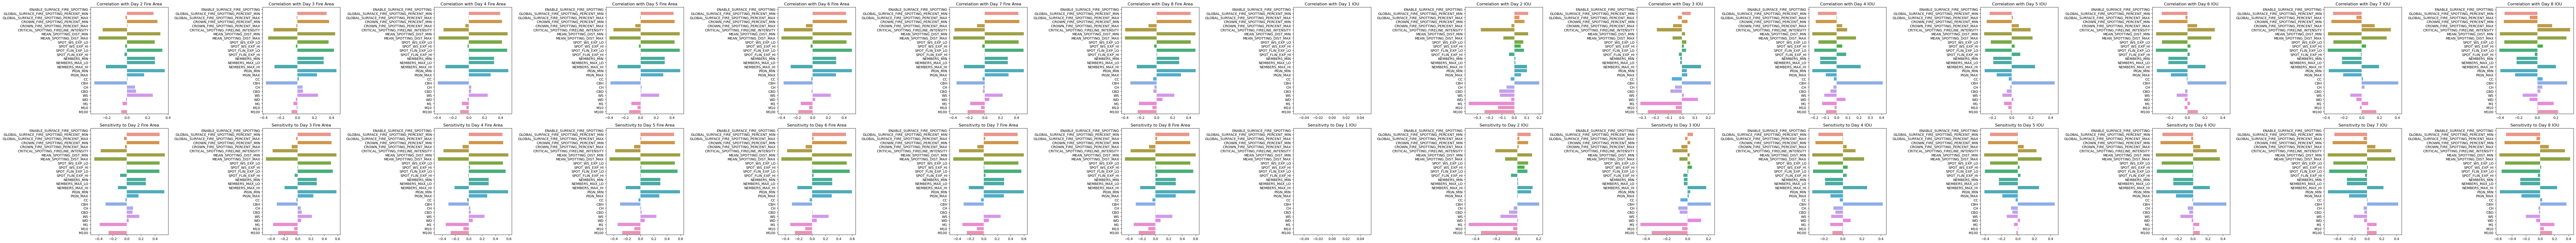

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

df = df_perim
cols_interest = ['Day 2 Fire Area', 'Day 3 Fire Area', 'Day 4 Fire Area',
       'Day 5 Fire Area', 'Day 6 Fire Area', 'Day 7 Fire Area',
       'Day 8 Fire Area', 'Day 1 IOU', 'Day 2 IOU', 'Day 3 IOU', 'Day 4 IOU',
       'Day 5 IOU', 'Day 6 IOU', 'Day 7 IOU', 'Day 8 IOU']

fig, axes = plt.subplots(2, len(cols_interest), figsize=(7* len(cols_interest), 10))

for i, out in enumerate(cols_interest):
    correlations = df[param_cols + [out]].corr()[out].drop(out)

    sensitivity = {}
    for col in param_cols:
        correlation, _ = spearmanr(df[col], df[out])
        sensitivity[col] = correlation

    # First plot - Correlation with out
    sns.barplot(x=correlations.values, y=correlations.index, ax=axes[0, i])
    axes[0, i].set_title(f'Correlation with {out}')

    # Second plot - Sensitivity to out
    sns.barplot(x=list(sensitivity.values()), y=list(sensitivity.keys()), ax=axes[1, i])
    axes[1, i].set_title(f'Sensitivity to {out}')

plt.tight_layout()
plt.show()

In [46]:
!pip install pygam


     ---------------------------------------- 1.8/1.8 MB 10.5 MB/s eta 0:00:00
     ------------------------------------- 840.9/840.9 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492053 sha256=7edda181bd4c994bbd4982e9465361c6ed4056ec9de383b6e907dfcebafc361a
  Stored in directory: c:\users\mnlee2\appdata\local\pip\cache\wheels\fa\cd\1f\c6b7b50b564983bf3011e8fc75d06047ddc50c07f6e3660b00
Successfully built future


In [199]:
print(df[param_cols].isnull().sum())


In [189]:
df_perim = df_perim.sort_values(by='Day 8 IOU', ascending=False)
df_perim['Day 8 IOU'].head(10)

888     0.594
1056    0.586
803     0.566
124     0.564
793     0.559
946     0.549
1117    0.542
200     0.541
388     0.540
569     0.539
Name: Day 8 IOU, dtype: float64

In [34]:
from pygam import LinearGAM, s, f
import pandas as pd

# Provided data
param_cols = [
    'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
    'CROWN_FIRE_SPOTTING_PERCENT_MAX',
    'CRITICAL_SPOTTING_FIRELINE_INTENSITY',
    'MEAN_SPOTTING_DIST_MAX',
    'SPOT_WS_EXP_HI',
    'SPOT_FLIN_EXP_HI',
    'NEMBERS_MAX_HI',
    'PIGN_MAX',
    "CC",
    "CBH",
    "CH",
    "CBD",
    "WS",
    "WD",
    "M1",
    "M10",
    "M100"
]
target_col = 'Day 8 Fire Area'

# Summarize the model
from pygam import LinearGAM, s
from pygam import LinearGAM, s, te
import matplotlib.pyplot as plt


# Use your DataFrame columns
df = df_perim

##########################################
cols_to_update = [
    'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
    'CROWN_FIRE_SPOTTING_PERCENT_MAX',
    'CRITICAL_SPOTTING_FIRELINE_INTENSITY',
    'MEAN_SPOTTING_DIST_MAX',
    'SPOT_WS_EXP_HI',
    'SPOT_FLIN_EXP_HI',
    'NEMBERS_MAX_HI',
    'PIGN_MAX'
]

df.loc[df['ENABLE_SPOTTING'] == '.FALSE.', cols_to_update] = 0
#df = df[df['ENABLE_SPOTTING'] != '.FALSE.']

#df= df[df['Nembers'].notna()]
##########################################
print(df.shape)

X = df[param_cols].values
y = df[target_col].values
n_splines = 12
# Define terms for GAM model based on your param_cols
terms = s(0)
for i in range(1, len(param_cols)):
    terms += s(i, n_splines=n_splines)


from itertools import combinations
# Define interaction terms you expect to be non-independent
non_independent_terms = [
    (param_cols.index('CC'), param_cols.index('CBD')),
    (param_cols.index('CH'), param_cols.index('CBD')),
    (param_cols.index('CBH'), param_cols.index('CBD')),
    (param_cols.index('CH'), param_cols.index('CBH')),
    (param_cols.index('CC'), param_cols.index('CH'))
]

# Define interaction terms you expect to be interactive
interactive_terms = [
    (param_cols.index('GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX'), param_cols.index('CC')),
    (param_cols.index('GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX'), param_cols.index('CH')),
    (param_cols.index('CROWN_FIRE_SPOTTING_PERCENT_MAX'), param_cols.index('CC')),
    (param_cols.index('CROWN_FIRE_SPOTTING_PERCENT_MAX'), param_cols.index('CH'))
]

# Add non-independent interaction terms
for term in non_independent_terms:
    terms += te(*term, n_splines=n_splines)

# Add interactive interaction terms
for term in interactive_terms:
    terms += te(*term, n_splines=n_splines)

# Model
gam = LinearGAM(terms)
#The gridsearch method in pyGAM is used to perform hyperparameter tuning. Essentially, it searches over a grid of hyperparameter values to find the best combination of hyperparameters that minimizes a given loss function (e.g., mean squared error for regression tasks). 
gam.gridsearch(X, y, keep_best=True) #
gam.summary()

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


(3840, 62)


  9% (1 of 11) |##                       | Elapsed Time: 0:00:09 ETA:   0:01:35
 18% (2 of 11) |####                     | Elapsed Time: 0:00:19 ETA:   0:01:25
 27% (3 of 11) |######                   | Elapsed Time: 0:00:28 ETA:   0:01:15
 36% (4 of 11) |#########                | Elapsed Time: 0:00:38 ETA:   0:01:10
 45% (5 of 11) |###########              | Elapsed Time: 0:00:48 ETA:   0:01:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:58 ETA:   0:00:51
 63% (7 of 11) |###############          | Elapsed Time: 0:01:09 ETA:   0:00:40
 72% (8 of 11) |##################       | Elapsed Time: 0:01:18 ETA:   0:00:28
 81% (9 of 11) |####################     | Elapsed Time: 0:01:28 ETA:   0:00:19
 90% (10 of 11) |#####################   | Elapsed Time: 0:01:37 ETA:   0:00:09
100% (11 of 11) |########################| Elapsed Time: 0:01:47 Time:  0:01:47


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    389.9122
Link Function:                     IdentityLink Log Likelihood:                                -49769.1675
Number of Samples:                         3840 AIC:                                           100320.1593
                                                AICc:                                           100409.022
                                                GCV:                                           207185.9448
                                                Scale:                                         169698.7063
                                                Pseudo R-Squared:                                   0.8252
Feature Function                  Lam

c:\Users\mnlee2\AppData\Local\anaconda3\envs\elmfire_notebook\lib\site-packages\ipykernel_launcher.py:93: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



In [14]:
df.head()

Description  INPUTS WIND_CONFIG  \
0  inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3839-lh...  inputs           0   
1  inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3836-lh...  inputs           0   
2  inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3835-lh...  inputs           0   
3  inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3838-lh...  inputs           0   
4  inputs=inputs_WIND=_SPOTTING=_S-CONFIG=3840-lh...  inputs           0   

  ENABLE_SPOTTING  CROWN_FIRE_MODEL  Wall clock time  Day 1 Fire Area  \
0         .FALSE.               2.0              0.0              0.0   
1         .FALSE.               2.0              0.0              0.0   
2         .FALSE.               2.0              0.0              0.0   
3         .FALSE.               2.0              0.0              0.0   
4         .FALSE.               2.0              0.0              0.0   

   Day 2 Fire Area  Day 3 Fire Area  Day 4 Fire Area  ...    CH   CBD   WS  \
0            0.001            0.001            0.001  ...  6.18 -0.10  3.8   
1            0.001            1.175            9.445  ...  6.18  0.06  3.8   
2            0.001            0.001            0.001  ... -0.10 -5.30  3.8   
3            0.001            1.308            9.026  ...  6.18 -0.10  3.8   
4            0.001            0.001            0.001  ...  6.18 -0.10  3.8   

    WD    M1   M10  M100  Wall clock time (s)  Fire volume (ac-ft)  Nembers  
0 -8.4  0.09 -0.03 -0.00                  NaN                  NaN      NaN  
1 -8.4  0.09 -0.03  0.01                  NaN                  NaN      NaN  
2 -8.4  0.09 -0.03  0.01                  NaN                  NaN      NaN  
3 -8.4  0.09 -0.06  0.01                  NaN                  NaN      NaN  
4 -8.4  0.09 -0.03  0.01                  NaN                  NaN      NaN  

[5 rows x 62 columns]

In [ ]:
import pandas as pd

def parse_text_block(text_block):
    # Split the text block into lines
    lines = text_block.strip().split('\n')

    # Define the column names
    columns = ['Feature Function', 'Lambda', 'Rank', 'EDoF', 'P > x', 'Sig. Code']

    # Initialize a list to hold the data rows
    data = []

    # Iterate through the lines, starting from the 5th line
    for line in lines[5:]:
        # Split the line into parts using whitespace
        parts = line.split()

        # Extract the feature function (e.g., "s(0)", "te(4, 15)")
        feature_function = parts[0]
        if parts[1] == '[':
            feature_function += ' ' + parts[2]
            lambda_value = parts[3:5]
            rank = parts[5]
            edof = ''
            p_value = parts[6]
            sig_code = parts[7]
        else:
            lambda_value = parts[1:3]
            rank = parts[3]
            edof = ''
            p_value = parts[4]
            sig_code = parts[5]

        # Combine lambda values if necessary
        lambda_value = ' '.join(lambda_value).replace('[', '').replace(']', '')

        # Append the row to the data list
        data.append([feature_function, lambda_value, rank, edof, p_value, sig_code])

    # Create a DataFrame from the data
    df = pd.DataFrame(data, columns=columns)
    
    return df


import io
import sys

# Redirect standard output to a string buffer
buffer = io.StringIO()
sys.stdout = buffer

# Call the summary method, which will write to the buffer
gam.summary()

# Restore standard output
sys.stdout = sys.__stdout__

# Get the contents of the buffer as a string
text_block = buffer.getvalue()

# You can now pass the text_block to the function to parse it
#print(text_block)

df_coeff = parse_text_block(text_block)
df_coeff.head(10)

In [ ]:
import pandas as pd
pcols = param_cols
pcols.append('intercept')
param_cols=pcols
# Lambda is a regularization parameter 
# The rank of a basis function represents the dimensionality or number of degrees of freedom (DoF) associated with the corresponding spline term. 
# EDoF is a measure of the effective complexity of a spline term
cols = [
    'Feature Function', 'Lambda', 'Rank', 
    'EDoF', 'P > x', 'Sig. Code'
]

import pandas as pd

data = {
    'Feature Function': ['s(0)', 's(1)', 's(2)', 's(3)', 's(4)', 's(5)', 's(6)', 's(7)', 's(8)', 's(9)', 's(10)', 's(11)', 's(12)', 's(13)', 's(14)', 's(15)', 's(16)', 's(17)', 's(18)', 's(19)', 's(20)', 's(21)', 'intercept'],
    'Lambda': [15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, 15.8489, ''],
    'Rank': [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 1],
    'EDoF': [7.0, 8.5, 6.7, 7.8, 10.3, 7.8, 6.2, 5.7, 5.4, 5.5, 4.7, 1.2, 0.3, 2.9, 6.3, 5.4, 5.8, 5.4, 4.8, 4.2, 4.6, 4.3, 0.0],
    'P > x': ['5.16e-01', '5.52e-05', '2.92e-02', '1.06e-03', '1.89e-14', '3.04e-03', '1.11e-16', '2.85e-01', '5.95e-14', '1.57e-08', '1.15e-03', '8.85e-01', '8.85e-01', '1.25e-07', '3.31e-04', '7.89e-13', '6.93e-07', '1.11e-16', '3.75e-04', '1.36e-04', '1.11e-16', '1.38e-05', '1.11e-16'],
    'Sig. Code': ['', '***', '*', '**', '***', '**', '***', '', '***', '***', '**', '', '', '***', '***', '***', '***', '***', '***', '***', '***', '***', '***']
}

for key in data:
    l = data[key]
    print(f'{key}, {len(l)}')

# df = pd.DataFrame(data)
# print(df)



print(f"Length of param_cols: {len(pcols)}")

# Create the DataFrame
df_coeff = pd.DataFrame(data) 

# Assign the feature names to the index of the DataFrame
df_coeff.index = param_cols
print(df_coeff.index)

import numpy as np

# Create x-values 
x1 = np.arange(len(df_coeff))
x2 = np.arange(len(df_coeff))

# Create y-values  
y1 = df_coeff['EDoF']
y2 = df_coeff['P > x']

fig, axs = plt.subplots(2, 1, figsize=(10,22))

axs[0].bar(x1, y1, color='blue', edgecolor='black')
axs[0].set_title('Effective Degrees of Freedom') # Add title
axs[0].set_xticks(x1)
axs[0].set_xticklabels(df_coeff.index, rotation=90)

axs[1].bar(x2, y2, color='green', edgecolor='black')
axs[1].set_yscale('log')

axs[1].set_title('P > x | P = 0.05 ') # Add title
axs[1].set_xticks(x2)  
axs[1].set_xticklabels(df_coeff.index, rotation=90)

# Add horizontal line 
axs[1].axhline(0.05, color='r', linestyle='--', linewidth=2)
plt.show()

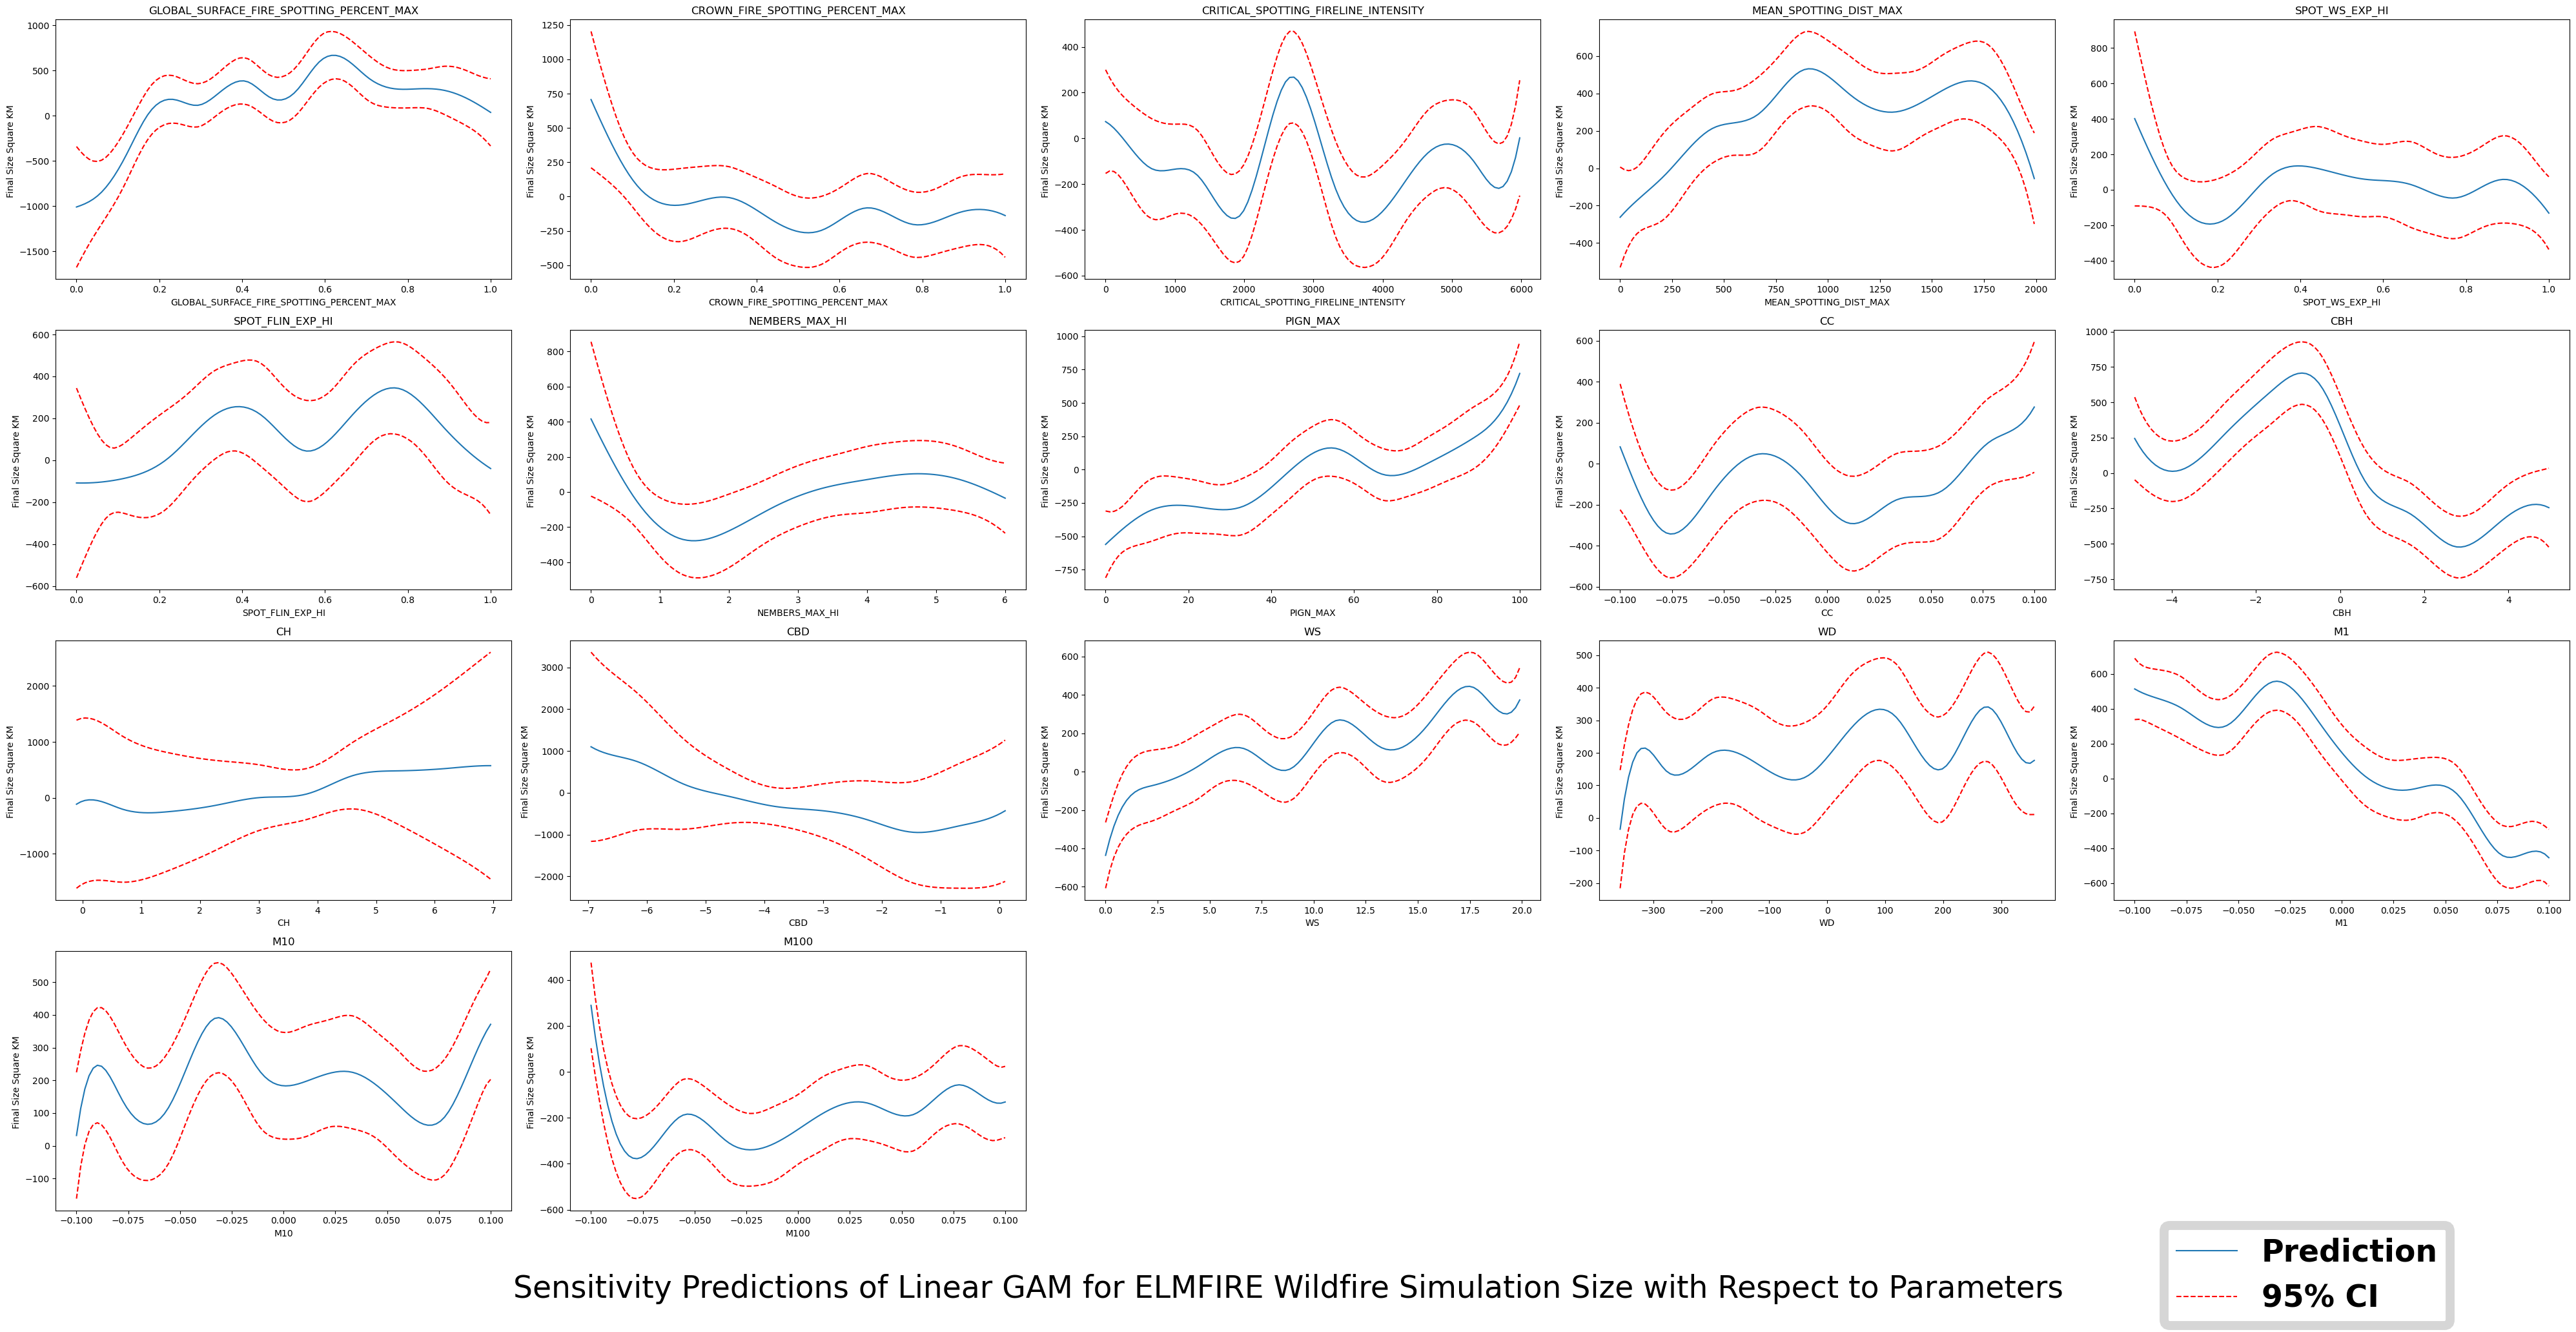

In [35]:
############################################################
import numpy as np
# Calculate the number of rows and columns for the subplot
n_params = len(param_cols)
n_rows = int(np.sqrt(n_params))
n_cols = int(np.ceil(n_params / n_rows))

# Create the subplot with the dynamically calculated size
fig, axs = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 5*n_rows))

# Flatten the axs array if necessary
axs = axs.flatten()

# ...

# Calculate the mean of the target variable
target_mean = df_perim['Day 8 Fire Area'].mean()
m_adj = df_perim['Day 8 Fire Area'].values - target_mean

# Plot each variable's partial dependence
for i, ax in enumerate(axs):
    if i < n_params:
        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

        ax.plot(XX[:, i], pdep)
        ax.plot(XX[:, i], confi, c='r', ls='--')

        # Get the original feature and response values
        original_feature = df_perim[param_cols[i]].values
        original_response = df_perim['Day 8 Fire Area'].values

        # # Create a copy of the original data and replace the current feature with its mean
        # X_other_mean = df_perim[param_cols].copy()
        # X_other_mean[param_cols[i]] = X_other_mean[param_cols[i]].mean()

        # # Calculate the baseline effect of all other predictors
        # baseline_effect = gam.predict(X_other_mean) - target_mean

        # # Adjust the original response values
        # adjusted_response = original_response - baseline_effect


        # Plot the adjusted original data
        #ax.scatter(original_feature, m_adj, c='gray', alpha=0.5)

        ax.set_title(param_cols[i])
        ax.set_xlabel(param_cols[i])
        ax.set_ylabel('Final Size Square KM ')

# ...


# Hide any remaining empty subplots
for i in range(n_params, len(axs)):
    axs[i].axis('off')

fig.suptitle("Sensitivity Predictions of Linear GAM for ELMFIRE Wildfire Simulation Size with Respect to Parameters", y=-0.02, fontsize=34)
# Modify the legend properties
legend = fig.legend(labels=['Prediction', '95% CI'], loc='lower right', bbox_to_anchor=(0.95, -0.06), borderaxespad=0.0, prop={'weight':'bold', 'size': 34})
frame = legend.get_frame()
frame.set_linewidth(10)  # Set legend frame linewidth
plt.tight_layout()
plt.show()

In [18]:
df_perim.shape

(3840, 62)

In [186]:
from scipy.stats import f_oneway
# Access terms and transformed variables
terms = gam.terms
transformed_vars = [term.c(X[:, term.feature]) for term in terms]

# Perform ANOVA on the transformed variables
anova_results = f_oneway(*transformed_vars)

# Print ANOVA results
for i, term in enumerate(terms):
    print(f"Term {i+1}: {term.feature_names} - F-value: {anova_results.statistic[i]}, p-value: {anova_results.pvalue[i]}")

AttributeError: 'SplineTerm' object has no attribute 'c'

In [ ]:
!pip install statsmodels

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
param_cols = [
    'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MIN',
    'GLOBAL_SURFACE_FIRE_SPOTTING_PERCENT_MAX',
    'CROWN_FIRE_SPOTTING_PERCENT_MIN',
    'CROWN_FIRE_SPOTTING_PERCENT_MAX',
    'CRITICAL_SPOTTING_FIRELINE_INTENSITY',
    'MEAN_SPOTTING_DIST_MIN',
    'MEAN_SPOTTING_DIST_MAX',
    'SPOT_WS_EXP_LO',
    'SPOT_WS_EXP_HI',
    'SPOT_FLIN_EXP_LO',
    'SPOT_FLIN_EXP_HI',
    'NEMBERS_MIN',
    'NEMBERS_MAX_LO',
    'NEMBERS_MAX_HI',
    'PIGN_MIN',
    'PIGN_MAX',
    "CC",
    "CBH",
    "CH",
    "CBD"]
df = df_perim
# Create a copy of the original DataFrame
df_temp = df.copy()

##########################################
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize each column in param_cols using Min-Max scaling
df_temp_normalized_minmax = df_temp.copy()
df_temp_normalized_minmax[param_cols] = scaler.fit_transform(df_temp_normalized_minmax[param_cols])
df_temp=df_temp_normalized_minmax
##############################################
# Replace spaces with underscores in the column names
df_temp.columns = [col.replace(' ', '_') for col in df_temp.columns]

# Update target_col and param_cols with the new names
target_col_temp = target_col.replace(' ', '_')
param_cols_temp = [col.replace(' ', '_') for col in param_cols]

# Formulate the ANOVA formula
formula = f"{target_col_temp} ~ {' + '.join(param_cols_temp)}"

# Fit the model
model = ols(formula, data=df_temp).fit()

# Perform ANOVA and store the results
anova_table = sm.stats.anova_lm(model, typ=2)

# Convert to a new DataFrame
anova_results_df = pd.DataFrame(anova_table)


In [1]:
df_temp.head()

NameError: name 'df_temp' is not defined

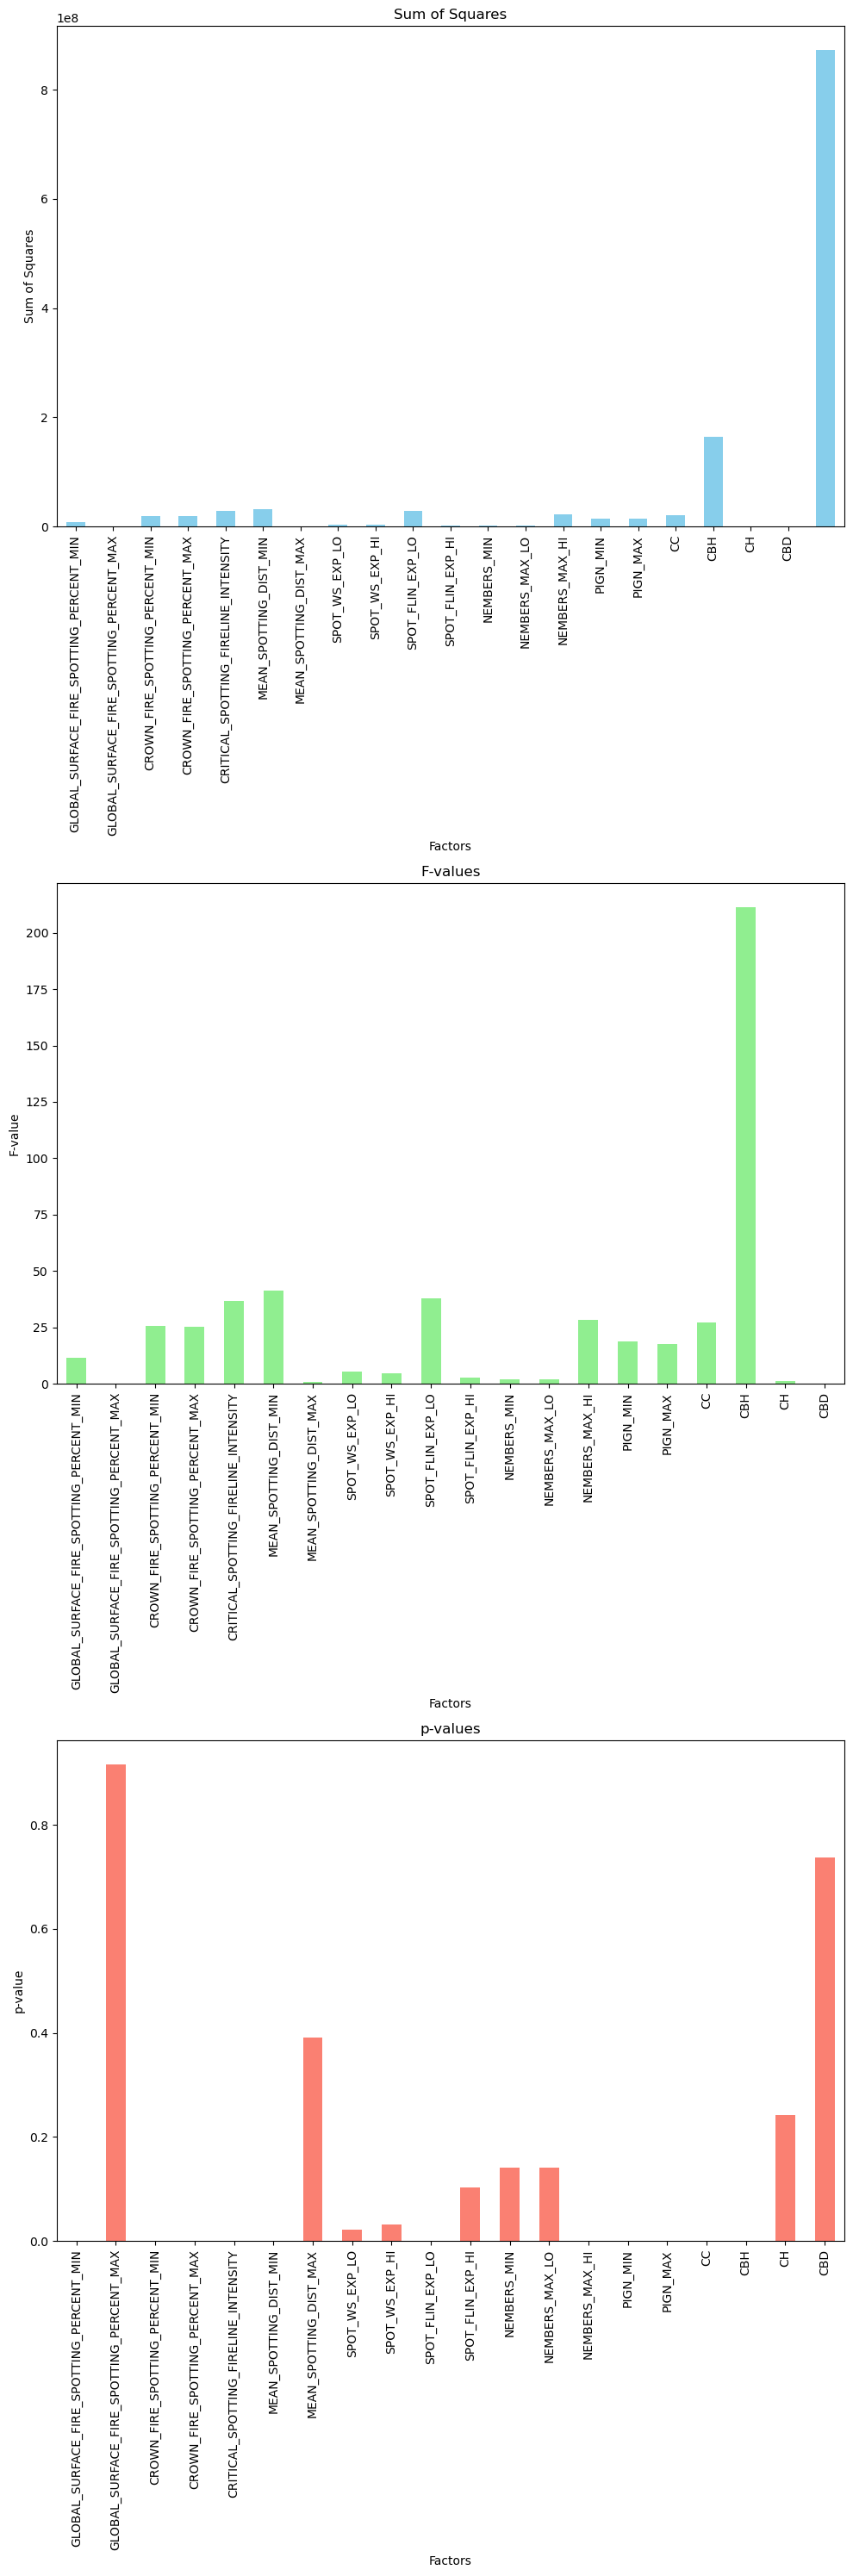

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

# Plot sum_sq
anova_results_df['sum_sq'].dropna().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Sum of Squares')
axes[0].set_xlabel('Factors')
axes[0].set_ylabel('Sum of Squares')
axes[0].set_xticks(range(len(param_cols)))
#axes[0].set_xticklabels(param_cols, rotation=45)

# Plot F-values
anova_results_df['F'].dropna().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('F-values')
axes[1].set_xlabel('Factors')
axes[1].set_ylabel('F-value')
axes[1].set_xticks(range(len(param_cols)))
#axes[1].set_xticklabels(param_cols, rotation=45)

# Plot p-values (PR(>F))
anova_results_df['PR(>F)'].dropna().plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('p-values')
axes[2].set_xlabel('Factors')
axes[2].set_ylabel('p-value')
axes[2].set_xticks(range(len(param_cols)))
axes[2].set_xticklabels(param_cols, rotation=90)

plt.tight_layout()
plt.show()


In [168]:
df_temp.head()

Description  INPUTS  WIND_CONFIG  ENABLE_SPOTTING  CROWN_FIRE_MODEL  \
0          NaN     NaN          NaN              NaN               0.0   
1          NaN     NaN          NaN              NaN               0.0   
2          NaN     NaN          NaN              NaN               0.0   
3          NaN     NaN          NaN              NaN               0.0   
4          NaN     NaN          NaN              NaN               0.0   

   Wall_clock_time  Day_1_Fire_Area  Day_2_Fire_Area  Day_3_Fire_Area  \
0              NaN              0.0           11.683           97.381   
1              NaN              0.0           11.402           36.334   
2              NaN              0.0           22.445          172.762   
3              NaN              0.0            9.677           26.988   
4              NaN              0.0            3.254           15.361   

   Day_4_Fire_Area  ...  SPOT_FLIN_EXP_HI  NEMBERS_MIN  NEMBERS_MAX_LO  \
0          251.604  ...               0.7          1.0             1.0   
1           76.915  ...               0.4          2.0             2.0   
2          798.787  ...               0.5          2.0             2.0   
3           52.644  ...               0.3          1.0             1.0   
4           33.521  ...               0.3          1.0             1.0   

   NEMBERS_MAX_HI  PIGN_MIN  PIGN_MAX    CC   CBH    CH   CBD  
0             2.0       4.0      45.0 -0.08 -1.44  0.06 -0.02  
1             2.0      41.0      54.0  0.07  3.91  0.02 -5.90  
2             2.0      56.0      74.0 -0.02 -0.86  0.04 -1.75  
3             2.0       9.0      40.0  0.03  2.51  0.03 -3.43  
4             2.0       6.0       8.0  0.02  3.94  0.43  0.06  

[5 rows x 54 columns]

In [126]:
directory_path = r"C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2"

files = [str(folder) for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

#for folder_name in files:
    #print(folder_name)

In [127]:
import numpy as np
import re
import pandas as pd

# Assuming 'files' contains the filenames you're working with
files = os.listdir(directory_path) # Replace with your directory path

s_config_values = np.sort([int(re.search(r'S-CONFIG=(\d+)-', file).group(1)) for file in files if re.search(r'S-CONFIG=(\d+)-', file)])

print(s_config_values)
sobol = pd.read_csv('sobol_seq_inputs.csv')
print(sobol.shape)

m = sobol.shape[0]
# Define the range of integers (1 to 3700)
all_integers = set(range(1, m + 1))

# Convert the list of extracted s_config_values to a set
s_config_set = set(s_config_values)

# Find the missing values using set difference
missing_values = sorted(all_integers - s_config_set)

# Print the missing values
print("Missing values:", missing_values)
print("Num Missing values:", len(missing_values))
print(f"Completed: {m-len(missing_values)}")
# Filter the DataFrame based on the 'Run Number' column
filtered_sobol = sobol[sobol['Run Number'].isin(missing_values)]

# Print the filtered DataFrame
print(filtered_sobol.shape)
# Save the filtered DataFrame to a CSV file
filtered_sobol.to_csv('rem_sobol_runs.csv', index=False)


[   1    2    3 ... 3838 3839 3840]
(3840, 32)
Missing values: []
Num Missing values: 0
Completed: 3840
(0, 32)


In [129]:
import os

def count_and_save_directories_with_file(root_dir):
    count = 0
    subdirs_with_file = []

    # Iterate through all subdirectories
    for subdir in os.listdir(root_dir):
        subdir_path = os.path.join(root_dir, subdir)
        
        # Check if the current subdir is a directory
        if os.path.isdir(subdir_path):
            # Check if "fire_size_stats.csv" exists in the current subdir
            if os.path.exists(os.path.join(subdir_path, "fire_size_stats.csv")):
                count += 1
                subdirs_with_file.append(subdir)

    return count, subdirs_with_file

# Example usage
root_directory=r"C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2"
count, subdirs_with_file = count_and_save_directories_with_file(root_directory)
print(f"Number of subdirectories with 'fire_size_stats.csv': {count}")
print("Subdirectories with 'fire_size_stats.csv':", subdirs_with_file)

# Count the number of items containing the string "CROWN-FIRE-MODEL=0"
count_with_string = sum("CROWN-FIRE-MODEL=0" in subdir for subdir in subdirs_with_file)

#okay weird it only does this for crown_fire=0
print(f"Number of items containing 'CROWN-FIRE-MODEL=0': {count_with_string}")

Number of subdirectories with 'fire_size_stats.csv': 0
Subdirectories with 'fire_size_stats.csv': []
Number of items containing 'CROWN-FIRE-MODEL=0': 0


In [39]:
!pip install rasterio

In [43]:
sub_dir = os.listdir(r"C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2")
folder_ex = sub_dir[0]

(2000, 2000)
4915050.0 32767.0 150
(2000, 2000)


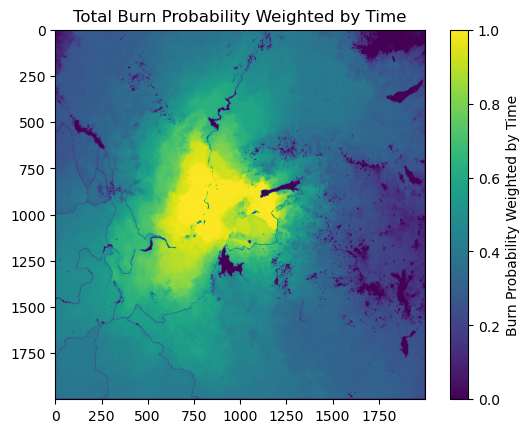

In [101]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

def find_toa_tif(folder):
    toa_files = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.tif') and 'time_of_arrival' in file:
                toa_files.append(os.path.join(root, file))
    return toa_files[0]

root_dir = r"C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2"
sub_dir = os.listdir(root_dir)

total_time = None
num_samples = 0
fail_count = 0
max_time = 0  # Keep track of the maximum time value
for folder_ex in sub_dir[:150]:
    #try:
    fire_fp = find_toa_tif(os.path.join(root_dir, str(folder_ex)))

    with rasterio.open(fire_fp) as fire_src:
        fire = fire_src.read(1)
        fire_time = np.where(fire > 32767.0, 0, fire)
        
        if total_time is None:
            total_time = np.zeros_like(fire_time)

        total_time += fire_time
        max_time = np.max([max_time, np.unique(fire_time)[-1]])
        num_samples += 1
    # except:
    #     fail_count += 1
    #     if fail_count % 25 == 0: print(fail_count)
    #     continue

print(total_time.shape)
d = num_samples * max_time
print(d, max_time, num_samples)
total_probability = total_time / d  if num_samples > 0 else None
print(total_probability.shape)
total_probability = np.array(total_probability)
total_probability=1-total_probability
plt.imshow(total_probability, cmap='viridis')
plt.colorbar(label='Burn Probability Weighted by Time')
plt.title('Total Burn Probability Weighted by Time')
plt.show()



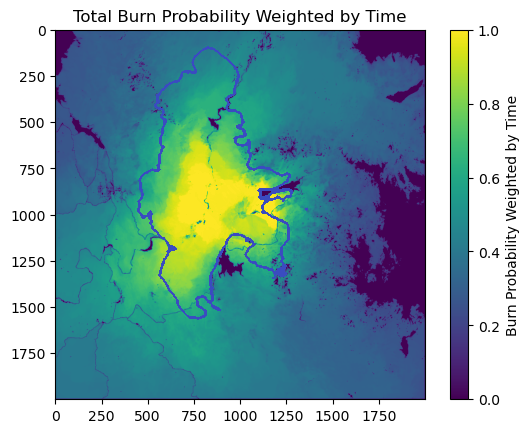

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # Import the PIL module to open images

# Open the PNG image
image_path = './rescaled_fire_perim.png'
image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.array(image)

# Apply the threshold
tp = np.where(total_probability < 0.2, 0, total_probability)

# Create a binary mask for the perimeter
perimeter_mask = (image_array > 0)

# Apply a thicker edge by dilating the perimeter mask
from scipy.ndimage import binary_dilation
thicker_perimeter_mask = binary_dilation(perimeter_mask, iterations=3)

# Set the perimeter pixels to white in the original image
image_array[thicker_perimeter_mask] = 255

# Invert the image
inverted_image = 255 - image_array
image = inverted_image
image = np.array(image)
image = np.where(image == 0, 255, np.nan)

plt.imshow(tp, cmap='viridis')
plt.colorbar(label='Burn Probability Weighted by Time')


plt.imshow(image, cmap='coolwarm')

plt.title('Total Burn Probability Weighted by Time')
plt.show()


array([    0.,  1801., 32767.], dtype=float32)

In [79]:
import pandas as pd

fire_df = pd.read_csv('fire_csv.csv')
# Assume the run number is part of the "INPUTS" column and extract it
fire_df['run_number'] = fire_df['ENABLE_SPOTTING'].str.extract('(\d+)-lhs-large').astype(int)
fire_df = fire_df.sort_values(by='run_number', ascending=True)

# Print the DataFrame to see the new column
#fire_df.head(40)
print(fire_df.shape)

(3731, 32)


In [131]:
files = fire_df['Description'].tolist()
#for x in files: print(x)

inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-CONFIG=1-lhs-large_CROWN-FIRE-MODEL=2_time_of_arrival.tif
inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-CONFIG=2-lhs-large_CROWN-FIRE-MODEL=2_time_of_arrival.tif
inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-CONFIG=3-lhs-large_CROWN-FIRE-MODEL=2_time_of_arrival.tif
inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-CONFIG=4-lhs-large_CROWN-FIRE-MODEL=2_time_of_arrival.tif
inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-CONFIG=5-lhs-large_CROWN-FIRE-MODEL=2_time_of_arrival.tif
inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-CONFIG=6-lhs-large_CROWN-FIRE-MODEL=2_time_of_arrival.tif
inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-CONFIG=7-lhs-large_CROWN-FIRE-MODEL=2_time_of_arrival.tif
inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-CONFIG=8-lhs-large_CROWN-FIRE-MODEL=2_time_of_arrival.tif
inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-CONFIG=9-lhs-large_CROWN-FIRE-MODEL=2_time_of_arrival.tif
inputs=inputs_WIND=ORIGINAL_SPOTTING=.TRUE._S-CONFIG=10-lhs-larg

In [80]:
run_numbers = []
run_list = []
file_list = fire_df['Description'].tolist()
for file in file_list:
    matches = re.findall(pattern, file)
    #if len(matches) == 1: print(f'{matches}')
    run_numbers += [int(match) for match in matches]

# Print the number of different items
print(f'Number of different items: {len(run_numbers)}')

# Print the run numbers that failed (missing sequential numbers from 0 to 578)
failed_runs = set(range(3840)) - set(run_numbers)
print('Failed runs:', sorted(failed_runs))

NameError: name 'pattern' is not defined

In [187]:
import os

# Path to the directory containing the folders
directory_path = r'C:\Users\mnlee2\Desktop\data\saved_outputs\sobol_inputs_2\outputs'

# Iterate through the items in the directory
for item_name in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item_name)

    # Check if the item is a directory and contains 'lhs'
    if os.path.isdir(item_path) and 'lhs' in item_name:
        # Replace 'lhs' with 'sobol' in the directory name
        new_dir_name = item_name.replace('lhs', 'sobol')
        new_dir_path = os.path.join(directory_path, new_dir_name)

        # Rename the directory
        os.rename(item_path, new_dir_path)

        # Iterate through the files in the renamed directory
        for file_name in os.listdir(new_dir_path):
            file_path = os.path.join(new_dir_path, file_name)

            # Check if the file name contains 'lhs'
            if 'lhs' in file_name:
                # Replace 'lhs' with 'sobol' in the file name
                new_file_name = file_name.replace('lhs', 'sobol')
                new_file_path = os.path.join(new_dir_path, new_file_name)

                # Rename the file
                os.rename(file_path, new_file_path)

print("Renaming completed.")


Renaming completed.
